# <font color='#FF8C00'>Problem Definition</font>

La salud mental en el ámbito laboral es un tema crítico, especialmente en el sector tecnológico, donde el estrés y la presión pueden afectar significativamente el bienestar de los empleados.

Analizar y predecir el comportamiento relacionado con la búsqueda de tratamiento en salud mental puede ser útil para las empresas al diseñar políticas y programas de apoyo más efectivos.

Objetivo: Desarrollar un modelo Machine Learning para predecir si una persona buscará tratamiento psicológico/psiquiátrico en función de las características personales, laborales y organizacionales observadas en las respuesta de la encuesta.

El modelo proporcionará insights sobre barreras o facilitadores que:

- Los empleados tienen para búsqueda o solicitud de ayuda
- Puedan servir de guías para implementar acciones específicas/efectivas para fomentar la salud mental en el lugar de trabajo.


Impacto del Proyecto

• Promover la creación de ambientes laborales inclusivos y conscientes de la salud mental.

• Proveer información clave para el diseño de políticas corporativas en materia de salud mental.

•  Mejorar calidad de vida y el desempeño de los empleados en el sector tecnológico.


# <font color='#FF8C00'>Environment preparation</font>

###<font color='#FF8C00'>Importing Libraries </font>

In [1]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns

from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)
pd.set_option('display.max_columns', 500)

Nota: en algunos apartados de repite la importación, únicamente se dejan por motivos de claridad para el alumno, del origen de la librería

# <font color='#FF8C00'>Data Access | Collection</font>


In [5]:
!rm -rf ialab
!git clone https://github.com/hacklifeplus/ialab.git


Cloning into 'ialab'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 2.79 MiB | 3.51 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Este conjunto de datos procede de una encuesta que intenta captar percepciones, actitudes y realidades en materia de la salud mental en el lugares de trabajo tecnológico.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1259 | 27 | 296 KB|


| Id | Features | Description |
| :-- | :--| :--|
|01|**Timestamp**|Hora en que se envió la encuesta.|
|02|**Age**|Edad de la persona.|
|03|**Gender**|Género de la persona.|
|04|**Country**|El nombre del país al que pertenece la persona. País de residencia.|
|05|**state**|El nombre del estado al que pertenece la persona. Estado de residencia.|
|06|**self_employed**|Si la persona es autónoma/autoempleada o no (trabaja como empleado para una empresa).|
|07|**family_history**|Si la historia familiar de la persona tuvo enfermedad mental o no.|
|08|**treatment**|¿Has buscado tratamiento psicológico o psiquiátrico para alguna cuestión de salud mental?|
|09|**work_intefere**|Si tienes alguna cuestión de salud mental, ¿sientes que interfiere en tu trabajo?|
|10|**no_employees**|¿Cuántos empleados tiene tu empresa u organización?|
|11|**remote_work**|¿Trabajas de forma remota (fuera de una oficina) al menos el 50% del tiempo?|
|12|**tech_company**|¿Trabajas en una empresa/organización de tecnología?|
|13|**benifits**|¿Tu empresa proporciona beneficios de salud mental?|
|14|**care_options**|¿Conoces las opciones de atención de salud mental que proporciona tu empresa?|
|15|**wellness_program**|¿Tiene tu empresa programas de salud mental como parte de un programa de bienestar para empleados?|
|16|**seek_help**|¿Tu empresa proporciona recursos para aprender más sobre problemas de salud mental y cómo buscar ayuda?|
|17|**anonymity**|¿Estás protegido mediante anonimato si usas de los recursos para tratamiento de salud mental?|
|18|**leave**|¿Es fácil para ti tomar una baja médica por una condición de salud mental?|
|19|**mental_health_consequence**|¿Crees que comentar un problema de salud mental en tu empresa tendría consecuencias negativas?|
|20|**phy_health_consequence**|¿Crees que comentar un problema de salud física en tu empresa tendría consecuencias negativas?|
|21|**coworkers**|¿Estarías dispuesto a comentar un problema de salud mental con tus compañeros de trabajo?|
|22|**supervisor**|¿Estarías dispuesto a comentar un problema de salud mental con tus supervisores directos?|
|23|**mental_health_interview**|¿Mencionarías un problema de salud mental en una entrevista para acceso a un trabajo?|
|24|**phs_health_interivew**|¿Mencionarías un problema de salud física en una entrevista para acceso a un trabajo?|
|25|**mental_vs_physical**|¿Percibes que tu empresa toma la salud mental tan en serio como la salud física?|
|26|**obs_consequence**|En tu lugar de trabajo ¿Has oído observado consecuencias negativas en empleados por temas de salud mental?|
|27|**comments**|Cualquier nota adicional o comentarios.|

In [6]:
data = pd.read_csv("/content/ialab/IT_mental_health.survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.shape

(1259, 27)

- Tenemos un total de **1259** filas & **27** columnas en este dataset.

# <font color='#FF8C00'>Exploratory Data Analysis EDA </font>




###<font color='#FF8C00'>Datos faltantes </font>

In [8]:
# Método 1. Obtener el número de valores NO nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Hemos encontrado valores faltantes en las siguientes columnas `state`, `self_employed`, `work_interfere` and `comments`.

In [9]:
# Método 2. Obtener el número de valores nulos
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
print(missing_data)

                           Total  Percent
comments                    1095     0.87
state                        515     0.41
work_interfere               264     0.21
self_employed                 18     0.01
seek_help                      0     0.00
obs_consequence                0     0.00
mental_vs_physical             0     0.00
phys_health_interview          0     0.00
mental_health_interview        0     0.00
supervisor                     0     0.00
coworkers                      0     0.00
phys_health_consequence        0     0.00
mental_health_consequence      0     0.00
leave                          0     0.00
anonymity                      0     0.00
Timestamp                      0     0.00
wellness_program               0     0.00
Age                            0     0.00
benefits                       0     0.00
tech_company                   0     0.00
remote_work                    0     0.00
no_employees                   0     0.00
treatment                      0  


| Columna (variable) | Númwero de valores faltantes | Proporción | Posible solución
| :-- | :-- | :-- | :-- |
| `state` | 515 | 40.91 %| Eliminar columna |
|`self_employed` | 18 | 1.43 %| Sustituir con la Moda |
| `work_interfere` | 264 | 20.94 %| Sustituir con la Moda |
| `comments` | 1095 | 86.97 %| Eliminar columna |

###<font color='#FF8C00'>Características, valores y número  </font>

In [10]:
# La función unique() nos proporciona los valores de literales o valores numéricos (únicos)
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
# La función unique() nos proporciona el número los valores literales o valores numéricos (únicos)
data['Gender'].nunique()

49

In [12]:
# Calcula el número de valores únicos por cada columna dado un dataset
import pandas as pd

def unique_values_per_column(dataset):
    unique_counts = dataset.nunique()
    return unique_counts


In [13]:
unique_values_per_column(data)

,0
Timestamp,1246
Age,53
Gender,49
Country,48
state,45
self_employed,2
family_history,2
treatment,2
work_interfere,4
no_employees,6


In [14]:
data['self_employed'].value_counts()

,count
self_employed,
No,1095
Yes,146


In [15]:
data['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,465
Never,213
Rarely,173
Often,144


In [16]:
data['no_employees'].value_counts()

,count
no_employees,
6-25,290
26-100,289
More than 1000,282
100-500,176
1-5,162
500-1000,60


In [17]:
data['tech_company'].value_counts()

,count
tech_company,
Yes,1031
No,228


In [18]:
data['leave'].value_counts()

,count
leave,
Don't know,563
Somewhat easy,266
Very easy,206
Somewhat difficult,126
Very difficult,98


In [19]:
data['Gender'].value_counts()

,count
Gender,
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


Para facilitar el análisis categorizaremos la característica `Gender` en `Male`,`Female`, and `Trans`.

### <font color='#FF8C00'>Valores duplicados</font>

In [20]:
data.duplicated().any()

False

##<font color='#FF8C00'>Outliers y Errores en datos</font>

### <font color='#FF8C00'>Valores numéricos</font>

In [21]:
print(data['Age'].describe())

count          1259.00
mean       79428148.31
std      2818299442.98
min           -1726.00
25%              27.00
50%              31.00
75%              36.00
max     99999999999.00
Name: Age, dtype: float64


**Observamos valores incorrectos en `Age`:**
   - `Max Age` de una persona no puede ser **99999999999.00**.
   - Tampoco una persona puede tener una edad negativa. El valor `min` **-1726**.

Como en términos generales la edad de **18 años** es la legal para trabajar en la fase de limpieza o tratamiento de datos tendremos que manejar estos errores. y también nos pondremos como límite superior la edad de **74 años**.

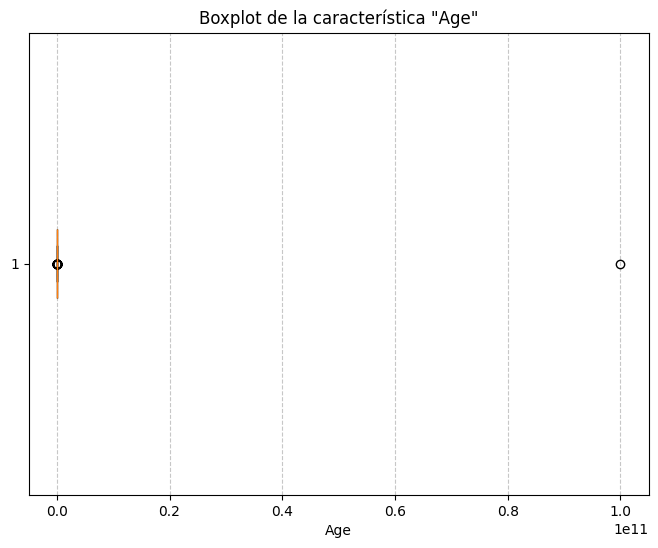

In [22]:
# Creación del diagrama boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=False, patch_artist=True)
plt.title('Boxplot de la característica "Age"')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [23]:
data[data['Age']<18]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [24]:
# Contar las filas donde 'Age' es menor de 18
count_under_18 = data[data['Age'] < 18].shape[0]
# Mostrar el resultado
print(count_under_18)

6


In [25]:
data[data['Age'] > 64]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,Yes,No,No,No,No,No,Don't know,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,Yes,No,Yes,Not sure,Don't know,Yes,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN


In [26]:
# Contar las filas donde 'Age' es mayor de 64
count_over_64 = data[data['Age'] > 64].shape[0]
# Mostrar el resultado
print(count_over_64)

4


##<font color='#FF8C00'>Control desbalanceado</font>

In [27]:
# Cálculo de número de muestras con cada clase (valor de la variable)
data['treatment'].value_counts()

,count
treatment,
Yes,637
No,622


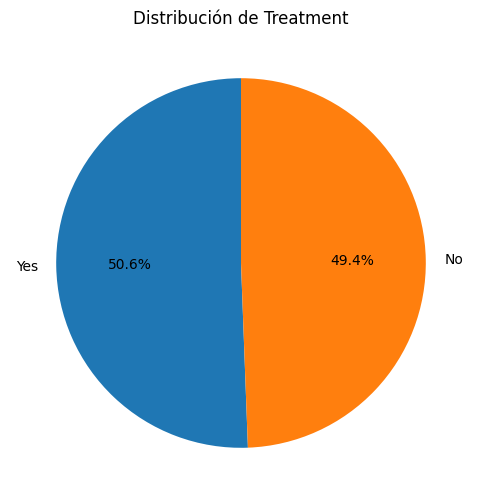

In [28]:
import matplotlib.pyplot as plt

# Suponiendo que tienes la salida de value_counts()
treatment_counts = data['treatment'].value_counts()

# Crear el gráfico de pastel (diagrama de queso)
plt.figure(figsize=(6,6))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Treatment')
plt.show()



In [29]:
data['treatment'].value_counts(normalize=True) * 100

,proportion
treatment,
Yes,50.60
No,49.40


Se nos muestra el número de muestras en cada clase (yes y no) y la proporción.
Si una de las clases tiene un porcentaje muy bajo (por ejemplo, menos del 10%), se considera un dataset desbalanceado.
En nuestro caso, la clase está perfectamente balanceada



# <font color='#FF8C00'>Data Preparation</font>

##<font color='#FF8C00'>Eliminar columnas innecesarias</font>

In [30]:
# Eliminando las columnas 'Timestamp', 'Country','state' y 'comments'
data = data.drop(['Timestamp', 'Country', 'state', 'comments'], axis=1)

# Confirmar que las columnas han sido eliminadas
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

##<font color='#FF8C00'>Corrección Datos faltantes </font>


<font color='#FF8C00'>self_employed</font>

In [31]:
# Número de filas sin el dato (valor null, np.nan)
data['self_employed'].isnull().sum()

18

In [32]:
# Valores que toma la característica
data['self_employed'].value_counts()

,count
self_employed,
No,1095
Yes,146


In [33]:
# Moda que tiene la característica
data['self_employed'].mode()[0]

'No'

In [34]:
# Sustitución de los valores faltantes np.nan por el valor de la moda de la característica
data['self_employed'] = data['self_employed'].replace(np.nan, data['self_employed'].mode()[0])

In [35]:
# Número de filas sin el dato (valor null, np.nan). Ya debe ser cero
data['self_employed'].isnull().sum()

0

<font color='#FF8C00'>work_interfere</font>

In [36]:
# Número de filas sin el dato (valor null, np.nan)
data['work_interfere'].isnull().sum()

264

In [37]:
# Valores que toma la característica
data['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,465
Never,213
Rarely,173
Often,144


In [38]:
# Moda que tiene la característica
data['work_interfere'].mode()[0]

'Sometimes'

In [39]:
# Método 1 Sustitución de los valores faltantes np.nan por el valor de la moda de la característica
data['work_interfere'] = data['work_interfere'].replace(np.nan, data['work_interfere'].mode()[0])

In [40]:
# Método 2. Imputación mediante distribución proporcional
# Esta estrategia consiste en imputar los valores faltantes de work_interfere
# en proporción a la frecuencia de cada categoría en los datos existentes.

# Calcular proporciones de cada categoría
# proportions = data['work_interfere'].value_counts(normalize=True)

# Encontrar índices de los valores faltantes
# missing_indices = data[data['work_interfere'].isna()].index

# Generar valores aleatorios según la distribución proporcional
# imputed_values = np.random.choice(proportions.index, size=len(missing_indices), p=proportions.values)

# Asignar los valores imputados
# data.loc[missing_indices, 'work_interfere'] = imputed_values



In [41]:
# Número de filas sin el dato (valor null, np.nan). Ya debe ser cero
data['work_interfere'].isnull().sum()

0

<font color='#FF8C00'>Verificación de datos faltantes</font>

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1259 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             1259 non-null   object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [43]:
# Método 2. Obtener el número de valores nulos
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
print(missing_data)

                           Total  Percent
Age                            0     0.00
seek_help                      0     0.00
mental_vs_physical             0     0.00
phys_health_interview          0     0.00
mental_health_interview        0     0.00
supervisor                     0     0.00
coworkers                      0     0.00
phys_health_consequence        0     0.00
mental_health_consequence      0     0.00
leave                          0     0.00
anonymity                      0     0.00
wellness_program               0     0.00
Gender                         0     0.00
care_options                   0     0.00
benefits                       0     0.00
tech_company                   0     0.00
remote_work                    0     0.00
no_employees                   0     0.00
work_interfere                 0     0.00
treatment                      0     0.00
family_history                 0     0.00
self_employed                  0     0.00
obs_consequence                0  

##<font color='#FF8C00'>Corrección Outliers y Errores</font>

<font color='#FF8C00'>Age</font>

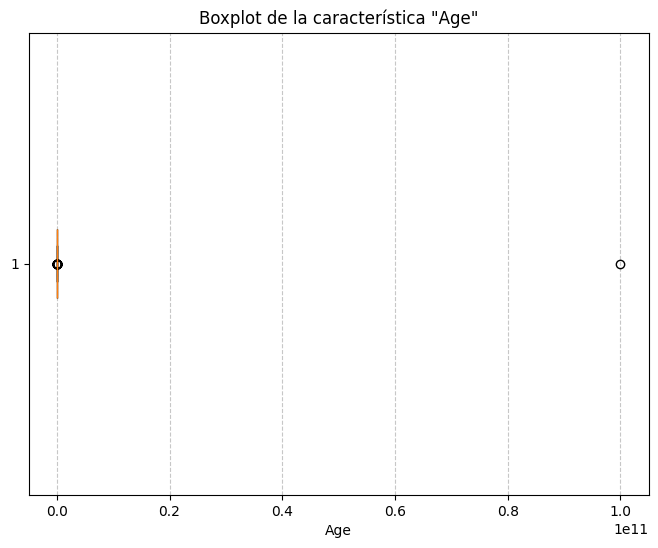

In [44]:
# Creación del diagrama boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=False, patch_artist=True)
plt.title('Boxplot de la característica "Age"')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [45]:
# Eliminar filas con edades menores de 18 años
data = data[data['Age']>=18]
# Contar las filas donde 'Age' es menor de 18
count_under_18 = data[data['Age'] < 18].shape[0]
# Mostrar el resultado
print(count_under_18)

0


In [46]:
# Eliminar filas con edades mayores de 64 años
data = data[data['Age'] <= 65]
# Contar las filas donde 'Age' es menor de 18
count_over_64 = data[data['Age'] > 65].shape[0]
# Mostrar el resultado
print(count_over_64)

0


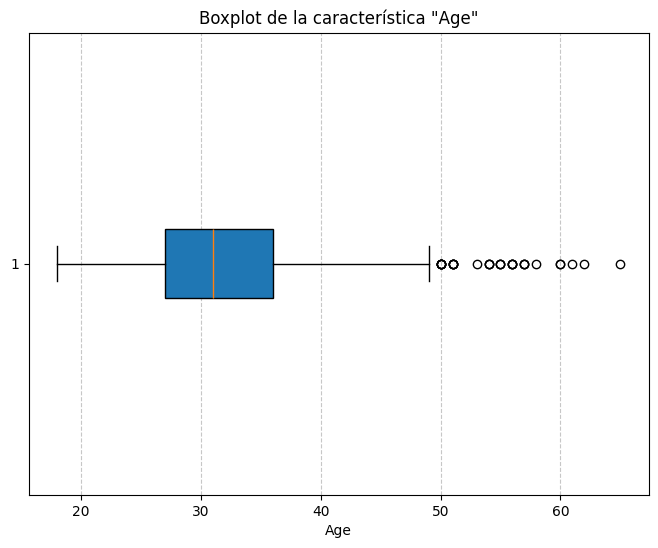

In [47]:
# Creación del diagrama boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=False, patch_artist=True)
plt.title('Boxplot de la característica "Age"')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [48]:
print(data['Age'].describe())

count   1250.00
mean      32.04
std        7.20
min       18.00
25%       27.00
50%       31.00
75%       36.00
max       65.00
Name: Age, dtype: float64


## <font color='#FF8C00'>Normalización de características</font>

In [49]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [50]:
data['Gender'].nunique()

46

In [51]:
data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [52]:
data['Gender'].str.lower().nunique()

40

In [53]:
data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61])

In [54]:
data['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [56]:
unique_gender = data['Gender'].str.lower().unique()

# Stratas of Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make",
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male",
            "cis male"]
other_str = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer",
             "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

# Iterate over rows and replace the inconsistent data with right data
for (row, col) in data.iterrows():
    if str.lower(col['Gender']) in male_str:
        data['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)

    if str.lower(col['Gender']) in female_str:
        data['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)

    if str.lower(col['Gender']) in other_str:
        data['Gender'].replace(to_replace=col['Gender'], value='other', inplace=True)

# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

# Display the unique value of Gender feature
print(data['Gender'].unique())

['female' 'male' 'other']


In [57]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

In [58]:
# DRS
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1250 non-null   int64 
 1   Gender                     1250 non-null   object
 2   self_employed              1250 non-null   object
 3   family_history             1250 non-null   object
 4   treatment                  1250 non-null   object
 5   work_interfere             1250 non-null   object
 6   no_employees               1250 non-null   object
 7   remote_work                1250 non-null   object
 8   tech_company               1250 non-null   object
 9   benefits                   1250 non-null   object
 10  care_options               1250 non-null   object
 11  wellness_program           1250 non-null   object
 12  seek_help                  1250 non-null   object
 13  anonymity                  1250 non-null   object
 14  leave        

In [60]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## <font color='#FF8C00'>Valores duplicados</font>

In [61]:
data.duplicated().any()

True

In [62]:
# Contar el número de filas duplicadas
numero_duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {numero_duplicados}")

Número de filas duplicadas: 4


In [63]:
# Eliminar filas duplicadas
data = data.drop_duplicates()

# Verificar el número de filas después de eliminar duplicados
numero_duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {numero_duplicados}")


Número de filas duplicadas: 0


## <font color='#FF8C00'>Almacenamiento datos limpios</font>

Almacenamos en un fichero los datos limpios originales con sus tipos de datos, tanto numéricos como categóricos. Fichero (cat) de categórico

In [64]:
data.to_csv("ialab/IT_mental_health.survey.clean.cat.csv", index=False)

## <font color='#FF8C00'>Conversión datos catégoricos en numéricos</font>

Para entrenar cierto modelos de ML se necesita convertir datos categóricos en datos numéricos (la mayoría de los modelos de ML requieren datos numéricos como entrada).

In [65]:
from sklearn import preprocessing
import pandas as pd

# Inicializar el diccionario para almacenar los mapeos de etiquetas
labelDict = {}

# Iterar sobre las columnas categóricas
for feature in data.select_dtypes(include=['object', 'category']).columns:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])

    # Crear el mapeo entre las clases originales y las etiquetas numéricas
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])

    # Almacenar el mapeo en labelDict
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [66]:
# Obtener los valores categóricos de la variable
categories = labelDict['label_Gender']

# Crear el diccionario de asignación categoría -> valor numérico
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}

# Mostrar el resultado
print("Asignación numérica de 'Gender':")
print(mapeo_numerico)

Asignación numérica de 'Gender':
{'female': 0, 'male': 1, 'other': 2}


In [67]:
categories = labelDict['label_family_history']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'family_history':")
print(mapeo_numerico)

Asignación numérica de 'family_history':
{'No': 0, 'Yes': 1}


In [68]:
categories = labelDict['label_work_interfere']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'work_interfere':")
print(mapeo_numerico)

Asignación numérica de 'work_interfere':
{'Never': 0, 'Often': 1, 'Rarely': 2, 'Sometimes': 3}


In [69]:
categories = labelDict['label_benefits']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'benefits':")
print(mapeo_numerico)

Asignación numérica de 'benefits':
{"Don't know": 0, 'No': 1, 'Yes': 2}


In [70]:
categories = labelDict['label_care_options']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'care_options':")
print(mapeo_numerico)

Asignación numérica de 'care_options':
{'No': 0, 'Not sure': 1, 'Yes': 2}


In [71]:
categories = labelDict['label_anonymity']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'anonymity':")
print(mapeo_numerico)

Asignación numérica de 'anonymity':
{"Don't know": 0, 'No': 1, 'Yes': 2}


In [72]:
categories = labelDict['label_leave']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'leave':")
print(mapeo_numerico)

Asignación numérica de 'leave':
{"Don't know": 0, 'Somewhat difficult': 1, 'Somewhat easy': 2, 'Very difficult': 3, 'Very easy': 4}


In [73]:
categories = labelDict['label_obs_consequence']
mapeo_numerico = {categoria: index for index, categoria in enumerate(categories)}
print("Asignación numérica de 'obs_consequence':")
print(mapeo_numerico)

Asignación numérica de 'obs_consequence':
{'No': 0, 'Yes': 1}


In [74]:
# Contar el número de filas duplicadas
numero_duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {numero_duplicados}")

Número de filas duplicadas: 0


## <font color='#FF8C00'>Almacenamiento datos numéricos</font>

In [75]:
data.to_csv("ialab/IT_mental_health.survey.clean.num.csv", index=False)

In [76]:
data = pd.read_csv("ialab/IT_mental_health.survey.clean.num.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1246 non-null   int64
 1   Gender                     1246 non-null   int64
 2   self_employed              1246 non-null   int64
 3   family_history             1246 non-null   int64
 4   treatment                  1246 non-null   int64
 5   work_interfere             1246 non-null   int64
 6   no_employees               1246 non-null   int64
 7   remote_work                1246 non-null   int64
 8   tech_company               1246 non-null   int64
 9   benefits                   1246 non-null   int64
 10  care_options               1246 non-null   int64
 11  wellness_program           1246 non-null   int64
 12  seek_help                  1246 non-null   int64
 13  anonymity                  1246 non-null   int64
 14  leave                   

# <font color='#FF8C00'>Selección de características</font>

## <font color='#FF8C00'>Matrices de Correlación</font>

Las **matrices de correlación** se utilizan comúnmente durante la fase de **Análisis Exploratorio de Datos (EDA)** del ciclo de vida de un proyecto de Machine Learning. En esta etapa, se analizan las relaciones entre las variables para comprender mejor el conjunto de datos y su estructura. Aquí es donde las matrices de correlación son más útiles, ya que permiten:

1. **Identificar Relaciones Lineales**: Ayudan a detectar relaciones lineales entre variables, lo cual es importante para seleccionar características relevantes.
2. **Detectar Multicolinealidad**: Pueden revelar si dos o más variables están altamente correlacionadas, lo que podría ser problemático en modelos sensibles a la multicolinealidad, como la regresión lineal.
3. **Informar la Selección de Características**: Conociendo la correlación, puedes eliminar características redundantes (altamente correlacionadas) que no añaden valor al modelo.

Aunque las matrices de correlación son particularmente importantes durante el EDA, también pueden ser útiles en las fases de **ingeniería de características** y **limpieza de datos**:

- **Ingeniería de características**: Las correlaciones pueden guiar la creación de nuevas variables, combinaciones de características o transformaciones (por ejemplo, eliminar variables que están muy correlacionadas entre sí).
- **Limpieza de datos**: En esta etapa, si se detectan correlaciones inesperadas, pueden señalar problemas en los datos, como errores de codificación o valores atípicos.

En resumen, las matrices de correlación se emplean principalmente durante el **EDA**, pero también pueden proporcionar información valiosa en la **ingeniería de características** y **limpieza de datos**.

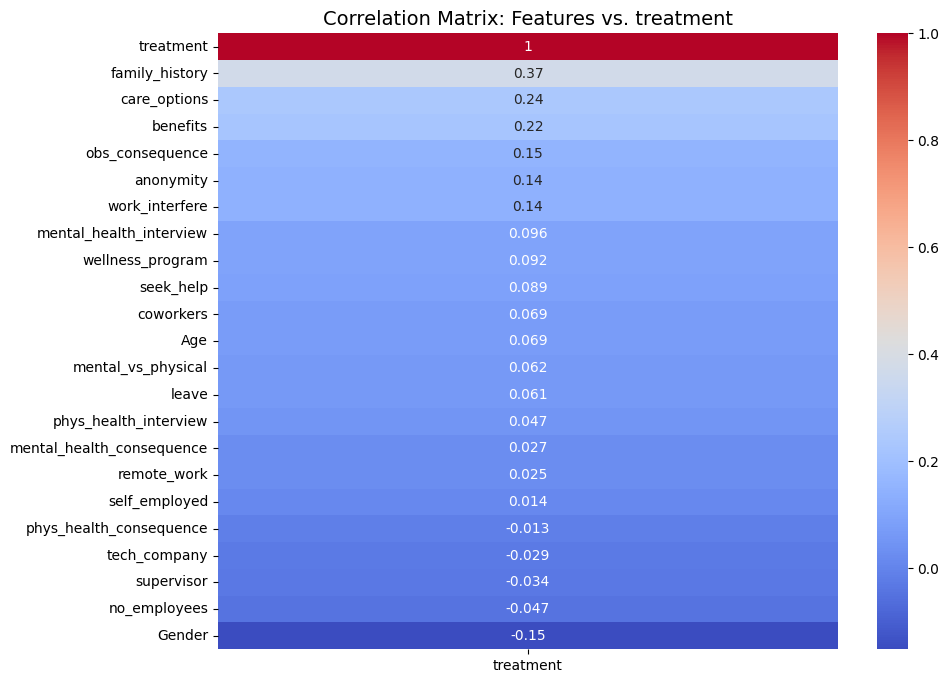

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Focus on correlations with the 'treatment' feature
treat_correlation = correlation_matrix[['treatment']].sort_values(by='treatment', ascending=False)

# Plot the correlation heatmap for Churn
plt.figure(figsize=(10, 8))
sns.heatmap(treat_correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Features vs. treatment', fontsize=14)
# plt.xlabel('Churn', fontsize=12)
# plt.ylabel('Features', fontsize=12)
plt.show()

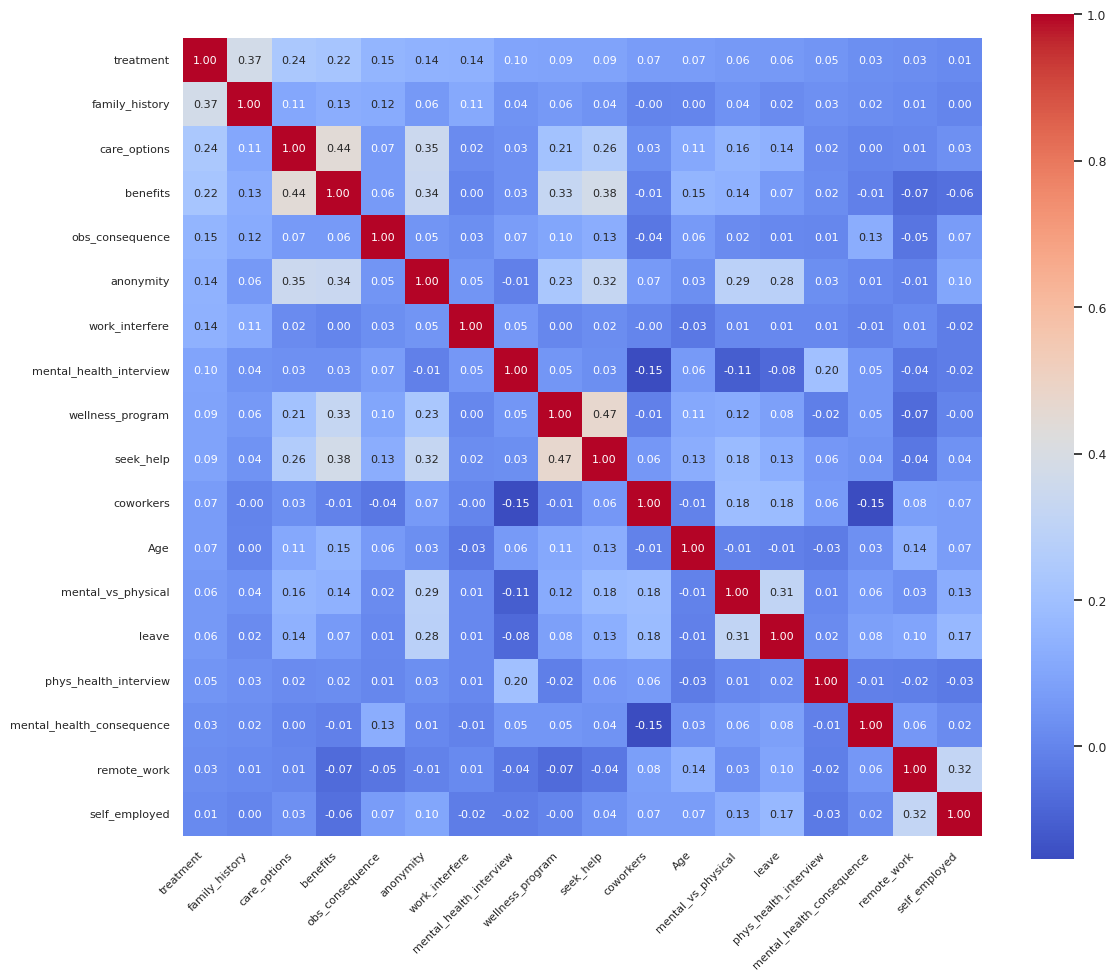

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'data' sea un DataFrame con valores numéricos
corrmat = data.corr()  # Calcula la matriz de correlación

# Número de variables para el heatmap
k = 18
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)

# Ajustes para mejorar la visibilidad
plt.figure(figsize=(12, 10))  # Aumenta el tamaño de la figura
sns.set(font_scale=0.8)  # Disminuye la escala de fuente general
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8},
                 cmap='coolwarm', yticklabels=cols.values, xticklabels=cols.values)  # Ajusta el tamaño de anotaciones
plt.xticks(rotation=45, ha='right', fontsize=8)  # Disminuye el tamaño de letra en las etiquetas del eje X
plt.yticks(fontsize=8)  # Disminuye el tamaño de letra en las etiquetas del eje Y
plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()


## <font color='#FF8C00'>ExtraTreesClassifier</font>

Para determinar la importancia de las características, podemos utilizar a su vez ML: un modelo de clasificación. (ej. `ExtraTreesClassifier`)

In [79]:
# define X and y
# feature_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees',
#                 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
#                 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
#                 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]

# feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
# feature_cols = ['Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity', 'leave']
# feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'obs_consequence', 'mental_health_interview', 'wellness_program', 'seek_help']
# feature_cols = ['family_history', 'benefits', 'care_options', 'anonymity', 'work_interfere', 'obs_consequence', 'mental_health_interview', 'wellness_program', 'seek_help']

feature_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees',
                 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
                 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]


X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [80]:
# Importar librerías necesarias
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
data_cat = pd.read_csv("ialab/IT_mental_health.survey.clean.cat.csv")

# Convertir características categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()
data_encoded = data_cat.copy()

for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Separar características (X) y variable objetivo (y)
X = data_encoded.drop(columns=['treatment'])  # Excluir la variable objetivo
y = data_encoded['treatment']

# Entrenar un modelo ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X, y)

# Obtener la importancia de las características
feature_importances = extra_trees.feature_importances_

# Crear un DataFrame con las características y sus importancias
extra_trees_results = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Importancia de las características:")
print(extra_trees_results)

Importancia de las características:
                      Feature  Importance
3              family_history        0.11
4              work_interfere        0.09
0                         Age        0.07
9                care_options        0.06
5                no_employees        0.06
13                      leave        0.05
8                    benefits        0.05
16                  coworkers        0.04
17                 supervisor        0.04
19      phys_health_interview        0.04
14  mental_health_consequence        0.04
20         mental_vs_physical        0.04
11                  seek_help        0.04
10           wellness_program        0.03
1                      Gender        0.03
6                 remote_work        0.03
12                  anonymity        0.03
15    phys_health_consequence        0.03
7                tech_company        0.03
18    mental_health_interview        0.02
21            obs_consequence        0.02
2               self_employed        0.0

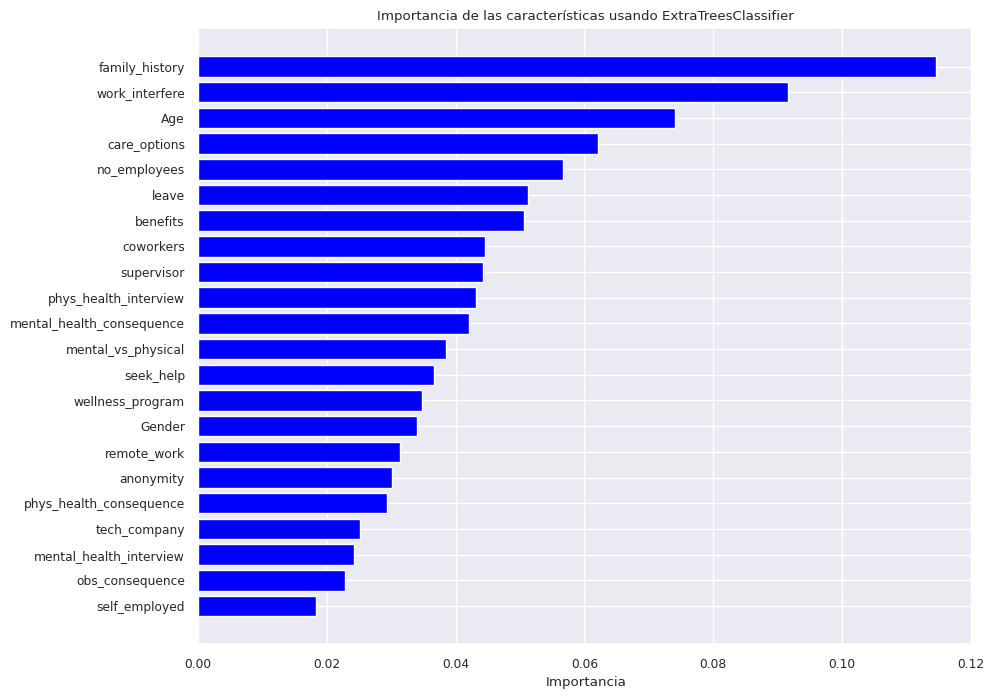

In [81]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(extra_trees_results['Feature'], extra_trees_results['Importance'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando ExtraTreesClassifier')
plt.gca().invert_yaxis()
plt.show()


## <font color='#FF8C00'>ANOVA F-Scores</font>

El puntaje F de ANOVA es una medida de la relación entre las características y la variable objetivo. </br> </br>
Un puntaje F más alto indica una mayor relación, lo que significa que la característica es más relevante para predecir la variable objetivo. </br>

**Obtención (visualización) de las características más importantes**:
- La gráfica muestra las 15 características con los puntajes F más altos. Estas son las características que más probablemente tengan un impacto significativo en la predicción de la variable objetivo (`treatment` en este caso).

**Interpretación práctica**:
- **Altos puntajes F**: Características con altos puntajes F son muy relevantes y deberían considerarse para incluir en el modelo. Estas características tienen una fuerte relación estadística con la variable objetivo.
- **Bajos puntajes F**: Aunque no se muestran en la gráfica, las características con puntajes F bajos tienen una relación más débil con la variable objetivo y podrían ser menos importantes para el modelo.

**Uso en la construcción del modelo**:
- **Reducción de dimensionalidad**: Seleccionar solo las características más importantes puede ayudar a reducir la dimensionalidad del conjunto de datos, lo que puede mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento.
- **Evitar sobreajuste**: Incluir solo las características más relevantes puede ayudar a evitar el sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a los datos nuevos.

Ejemplo concreto:
- Supongamos que una de las características más importantes es `work_interfere`, con un alto puntaje F. Esto sugiere que la interferencia del trabajo con la salud mental tiene una fuerte relación con la variable objetivo `treatment`. Por lo tanto, esta característica debe ser cuidadosamente considerada en el modelo de predicción, ya que proporciona información valiosa sobre la probabilidad de que una persona reciba tratamiento para problemas de salud mental.

Siguiente paso:
- Con esta información, puedes proceder a construir y evaluar tu modelo de aprendizaje automático utilizando las características seleccionadas. Aquí hay un ejemplo de cómo puedes ajustar tu pipeline con las características seleccionadas:

En resumen, los puntajes F de ANOVA te ayudan a identificar las características más relevantes para tu modelo, lo que mejora la eficiencia y la efectividad de tus predicciones.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV
data  = pd.read_csv("ialab/IT_mental_health.survey.clean.num.csv")

# Separar características y etiqueta
X = data.drop('treatment', axis=1)  # Suponiendo que 'treatment' es la variable objetivo
y = data['treatment']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular los puntajes ANOVA
f_scores, p_values = f_classif(X_scaled, y)

# Crear un DataFrame con los resultados ordenados por F-Score
feature_names = X.columns
anova_results = pd.DataFrame({
    'Feature': feature_names,
    'F-Score': f_scores,
    'P-Value': p_values
})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

# Mostrar la tabla con los resultados
print(anova_results)

                      Feature  F-Score  P-Value
3              family_history   202.37     0.00
9                care_options    74.16     0.00
8                    benefits    65.96     0.00
21            obs_consequence    30.20     0.00
1                      Gender    29.28     0.00
12                  anonymity    26.09     0.00
4              work_interfere    25.24     0.00
18    mental_health_interview    11.45     0.00
10           wellness_program    10.56     0.00
11                  seek_help    10.03     0.00
16                  coworkers     5.97     0.01
0                         Age     5.94     0.01
20         mental_vs_physical     4.78     0.03
13                      leave     4.61     0.03
5                no_employees     2.80     0.09
19      phys_health_interview     2.76     0.10
17                 supervisor     1.48     0.22
7                tech_company     1.04     0.31
14  mental_health_consequence     0.91     0.34
6                 remote_work     0.80  

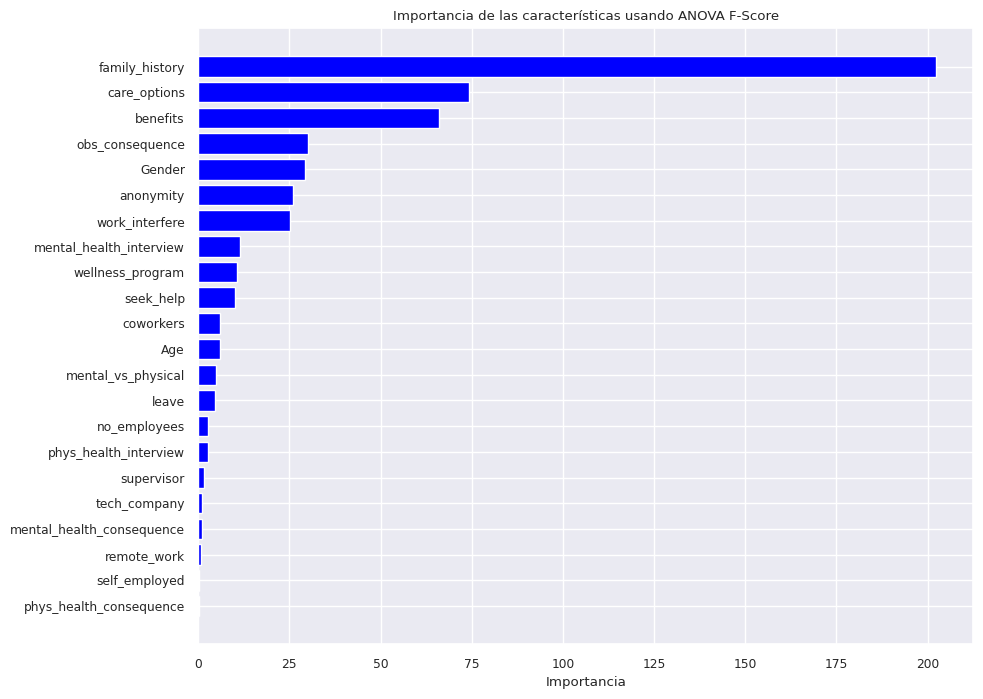

In [83]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(anova_results['Feature'], anova_results['F-Score'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando ANOVA F-Score')
plt.gca().invert_yaxis()
plt.show()

## <font color='#FF8C00'>Chi-cuadrado</font>



Este valor indica la fuerza de la asociación entre cada característica y la variable objetivo. Un valor más alto sugiere una mayor relevancia o dependencia entre la característica y la variable objetivo.

El objetivo principal de este código es identificar qué características categóricas están más asociadas con la variable de predicción `treatment` usando la prueba de Chi-cuadrado. Esto puede ser útil en análisis de datos, ya que permite reducir la dimensionalidad seleccionando solo las variables relevantes, lo cual puede mejorar la interpretación del modelo y su rendimiento

In [84]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
data = pd.read_csv("ialab/IT_mental_health.survey.clean.cat.csv")

# Seleccionar las columnas categóricas. En teoría todas
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)


# Imputar valores faltantes y codificar las variables categóricas
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = data[column].astype(str)  # Convertir a string para evitar problemas con NaNs
    data[column] = label_encoders[column].fit_transform(data[column])

# Seleccionar las características y la variable de predicción
X = data[categorical_columns].drop(columns=['treatment'], errors='ignore')
y = data['treatment']

# Prueba de Chi-cuadrado entre cada una de las características categóricas en X y la variable de predicción y.
# chi2_scores: Las puntuaciones Chi-cuadrado para cada característica.
# p_values: Los valores p correspondientes que indican la significancia estadística.
chi2_scores, p_values = chi2(X, y)

# Crear un DataFrame con los resultados
# Nombre de cada característica categórica, su puntuación Chi-cuadrado y su valor p.
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
})

# Filtrar las características con un p-valor menor a 0.05 (nivel de significancia típico)
# Esto indica que estas características tienen una asociación estadísticamente significativa con la variable 'treatment'.
# significant_features = chi2_results[chi2_results['P-Value'] < 0.05]
chi2_results = chi2_results[chi2_results['P-Value'] < 0.1]

# Ordenar de mayor a menor importancia basada en la puntuación de Chi-cuadrado
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Mostrar las características significativas
print(chi2_results)


Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')
               Feature  Chi2 Score  P-Value
2       family_history      106.34     0.00
8         care_options       55.13     0.00
7             benefits       41.90     0.00
11           anonymity       32.66     0.00
20     obs_consequence       25.29     0.00
3       work_interfere       15.73     0.00
12               leave        7.44     0.01
0               Gender        6.26     0.01
10           seek_help        5.28     0.02
19  mental_vs_physical        4.08     0.04
9     wellness_program        3.35     0.07
4         no_emplo

**Chi2 Score.** En este caso, la característica `treatment` tiene el valor más alto (622), indicando una asociación muy fuerte con la variable objetivo, seguida por `family_history` (108) y `care_options` (54). </br> </br>






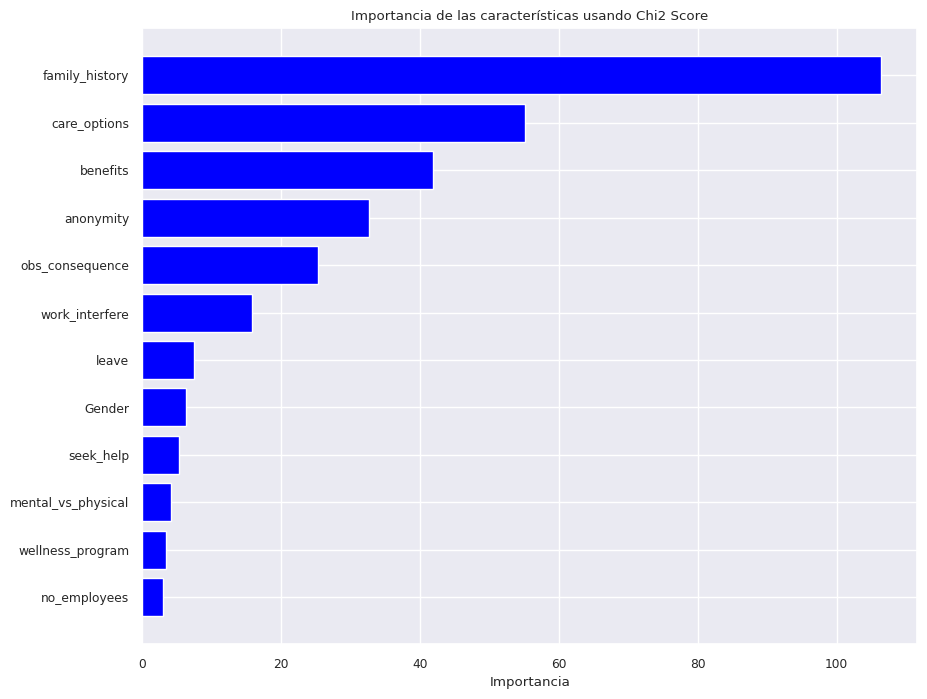

In [85]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(chi2_results['Feature'], chi2_results['Chi2 Score'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando Chi2 Score')
plt.gca().invert_yaxis()
plt.show()

## <font color='#FF8C00'>Mutual Information Score</font>

In [86]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
data = pd.read_csv("ialab/IT_mental_health.survey.clean.num.csv")

# Seleccionar las columnas (ya codificadas) excepto la variable objetivo 'treatment'
X = data.drop(columns=['treatment'], errors='ignore')
y = data['treatment']


# Calcular la Información Mutua
mutual_info_scores = mutual_info_classif(X, y, discrete_features=True)

# Crear un DataFrame con los resultados
mutual_info_results = pd.DataFrame({
    'Feature':  X.columns,
    'Mutual Info Score': mutual_info_scores
})

# Ordenar de mayor a menor importancia basada en la puntuación de Información Mutua
mutual_info_results = mutual_info_results.sort_values(by='Mutual Info Score', ascending=False)

# Mostrar las características ordenadas por Información Mutua
print(mutual_info_results)

                      Feature  Mutual Info Score
4              work_interfere               0.09
3              family_history               0.07
9                care_options               0.04
8                    benefits               0.03
1                      Gender               0.02
0                         Age               0.02
13                      leave               0.01
21            obs_consequence               0.01
12                  anonymity               0.01
14  mental_health_consequence               0.01
20         mental_vs_physical               0.01
18    mental_health_interview               0.01
11                  seek_help               0.00
10           wellness_program               0.00
5                no_employees               0.00
16                  coworkers               0.00
19      phys_health_interview               0.00
15    phys_health_consequence               0.00
17                 supervisor               0.00
7                tec

In [87]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
data = pd.read_csv("ialab/IT_mental_health.survey.clean.cat.csv")

# Seleccionar las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)


# Imputar valores faltantes y codificar las variables categóricas
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = data[column].astype(str)  # Convertir a string para evitar problemas con NaNs
    data[column] = label_encoders[column].fit_transform(data[column])

# Seleccionar las características y la variable de predicción
X = data[categorical_columns].drop(columns=['treatment'], errors='ignore')
y = data['treatment']

# Calcular la Información Mutua
mutual_info_scores = mutual_info_classif(X, y, discrete_features=True)

# Crear un DataFrame con los resultados
mutual_info_results = pd.DataFrame({
    'Feature':  X.columns,
    'Mutual Info Score': mutual_info_scores
})

# Ordenar de mayor a menor importancia basada en la puntuación de Información Mutua
mutual_info_results = mutual_info_results.sort_values(by='Mutual Info Score', ascending=False)

# Mostrar las características ordenadas por Información Mutua
print(mutual_info_results)


Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')
                      Feature  Mutual Info Score
3              work_interfere               0.09
2              family_history               0.07
8                care_options               0.04
7                    benefits               0.03
0                      Gender               0.02
12                      leave               0.01
20            obs_consequence               0.01
11                  anonymity               0.01
13  mental_health_consequence               0.01
19         mental_vs_physical               0.01
17    m

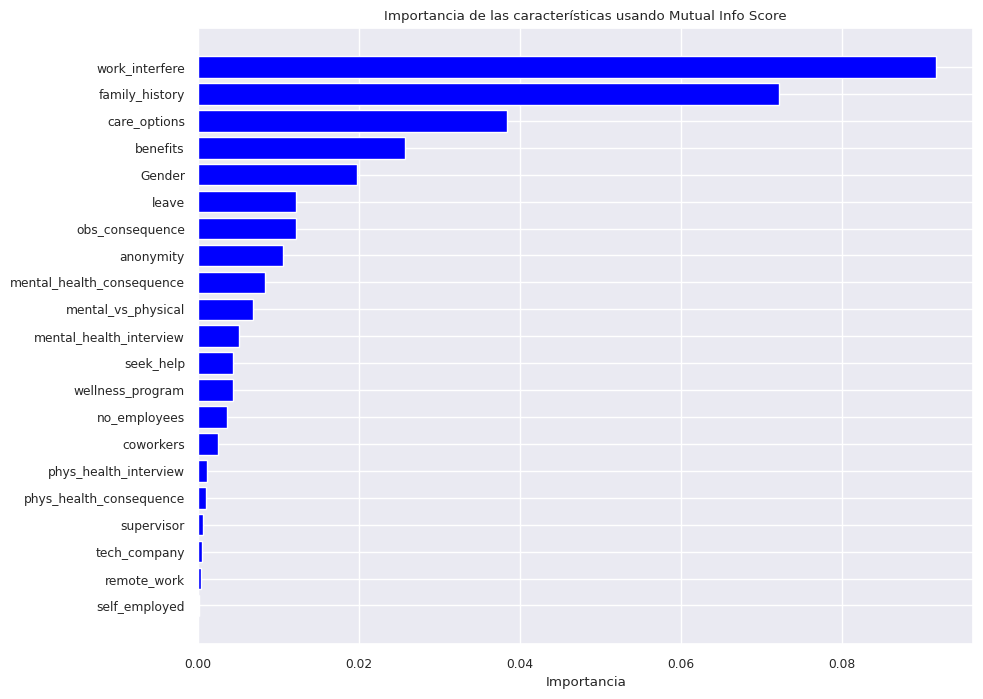

In [88]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(mutual_info_results['Feature'], mutual_info_results['Mutual Info Score'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando Mutual Info Score')
plt.gca().invert_yaxis()
plt.show()

## <font color='#FF8C00'>Análisis por parejas de variables</font>

In [89]:
from scipy.stats import chi2_contingency
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['obs_consequence'], data['treatment'])

# Calcular Chi-cuadrado de independencia
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print("Tabla de contingencia:\n", contingency_table)
print("\nEstadístico Chi-cuadrado:", chi2)
print("p-valor:", p_value)
print("Grados de libertad:", dof)

# Interpretación del resultado
if p_value < 0.05:
    print("\nConclusión: Existe una relación estadísticamente significativa entre 'obs_consequence' y 'treatment'.")
else:
    print("\nConclusión: No existe una relación estadísticamente significativa entre 'obs_consequence' y 'treatment'.")

Tabla de contingencia:
 treatment          0    1
obs_consequence          
0                562  505
1                 55  124

Estadístico Chi-cuadrado: 28.658572107225034
p-valor: 8.6330987366828e-08
Grados de libertad: 1

Conclusión: Existe una relación estadísticamente significativa entre 'obs_consequence' y 'treatment'.


In [90]:
from scipy.stats import chi2_contingency
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['tech_company'], data['treatment'])

# Calcular Chi-cuadrado de independencia
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print("Tabla de contingencia:\n", contingency_table)
print("\nEstadístico Chi-cuadrado:", chi2)
print("p-valor:", p_value)
print("Grados de libertad:", dof)

# Interpretación del resultado
if p_value < 0.05:
    print("\nConclusión: Existe una relación estadísticamente significativa entre 'tech_company' y 'treatment'.")
else:
    print("\nConclusión: No existe una relación estadísticamente significativa entre 'tech_company' y 'treatment'.")

Tabla de contingencia:
 treatment       0    1
tech_company          
0             104  120
1             513  509

Estadístico Chi-cuadrado: 0.8977839963705211
p-valor: 0.3433765988798485
Grados de libertad: 1

Conclusión: No existe una relación estadísticamente significativa entre 'tech_company' y 'treatment'.


## <font color='#FF8C00'>Análisis para selección de caracterísiticas</font>
Los resultados de los diferentes métodos de selección de características ofrecen diferentes perspectivas sobre la importancia de las variables para el modelo de aprendizaje automático. A continuación, se analizan las similitudes, diferencias y posibles conclusiones de cada método:

---

### **1. Extra Trees Classifier**
- **Naturaleza del método:** Este algoritmo mide la importancia de las características basándose en la reducción del criterio de división (como la Gini o la entropía) a través de los árboles.
- **Principales características:**
  - `family_history` (0.11)
  - `work_interfere` (0.09)
  - `Age` (0.07)
  - `care_options`, `no_employees` (0.06)

**Comentario:**
- Este método destaca la interacción de las características con el objetivo durante las particiones.
- Variables como `family_history` y `work_interfere` son consistentemente relevantes, lo cual es coherente con su presencia en otros métodos.

---

### **2. Anova F-Scores**
- **Naturaleza del método:** Evalúa la correlación entre las características independientes y la variable objetivo mediante la relación de varianza.
- **Principales características (basadas en F-Score):**
  - `family_history` (202.37)
  - `care_options` (74.16)
  - `benefits` (65.96)
  - `obs_consequence` (30.20)
  - `Gender` (29.28)

**Comentario:**
- `family_history`, `care_options` y `benefits` dominan aquí, indicando fuerte asociación con la variable objetivo.
- La significancia de características como `Gender` y `anonymity` también es alta, lo cual no es tan marcado en otros métodos.

---

### **3. Chi Cuadrado**
- **Naturaleza del método:** Mide la independencia entre una característica categórica y la variable objetivo.
- **Principales características (basadas en Chi2 Score):**
  - `family_history` (106.34)
  - `care_options` (55.13)
  - `benefits` (41.90)
  - `anonymity` (32.66)
  - `obs_consequence` (25.29)

**Comentario:**
- Este método refuerza la importancia de características categóricas (`family_history`, `care_options`, `benefits`) similares a las identificadas por ANOVA.
- Aunque algunas variables con baja relación en otros métodos, como `anonymity`, son más significativas aquí, debido a su naturaleza categórica.

---

### **4. Mutual Information Score**
- **Naturaleza del método:** Mide la dependencia no lineal entre las características y la variable objetivo.
- **Principales características:**
  - `work_interfere` (0.09)
  - `family_history` (0.07)
  - `care_options` (0.04)
  - `benefits` (0.03)
  - `Gender` (0.02)

**Comentario:**
- Este método destaca relaciones más sutiles o no lineales. Las características `work_interfere` y `family_history` vuelven a ser relevantes.
- Características como `benefits` y `care_options` tienen una dependencia más moderada.

---

### **Análisis Comparativo**
1. **Consistencia entre métodos:**
   - `family_history`: Consistentemente alta en todos los métodos.
   - `work_interfere`, `care_options` y `benefits`: Altamente relevantes en la mayoría.
   - `obs_consequence`: Moderadamente importante según Chi Cuadrado y ANOVA.

2. **Diferencias notables:**
   - Métodos como Extra Trees y Mutual Information consideran interacciones no lineales, lo que puede darles una ventaja en conjuntos de datos más complejos.
   - ANOVA y Chi Cuadrado tienden a destacar variables categóricas más claramente.

3. **Características con baja relevancia general:**
   - Variables como `self_employed`, `tech_company` y `remote_work` tienen puntuaciones bajas en casi todos los métodos, indicando que su impacto puede ser marginal.

---

### **Recomendación Final**
- Priorizar las características seleccionadas por múltiples métodos: `family_history`, `work_interfere`, `care_options`, `benefits`.
- Realizar una validación cruzada con diferentes subconjuntos de características para comprobar su impacto en el rendimiento del modelo.
- Considerar eliminar o fusionar características de baja relevancia (`self_employed`, `remote_work`) para reducir la dimensionalidad del modelo.


## <font color='#FF8C00'>Caracterísiticas seleccionadas</font>

In [91]:
# feature_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees',
#                 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
#                 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
#                 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]

# práctica_1. Introducir la característica edad (Age)
# feature_cols = ['family_history', 'care_options', 'benefits', 'anonymity', 'obs_consequence', 'work_interfere', 'leave', 'Gender', 'Age']

feature_cols = ['family_history', 'care_options', 'benefits', 'anonymity', 'obs_consequence', 'work_interfere', 'leave', 'Gender']


# ExtraTreesClassifier = ['family_history', 'work_interfere', 'Age', 'care_options', 'no_employees', 'leave', 'benefits','coworkers']
# ANOVA = ['family_history', 'care_options', 'benefits', 'obs_consequence', 'Gender', 'anonymity', 'work_interfere', 'mental_health_interview']
# Chi2 = ['family_history', 'care_options', 'benefits', 'anonymity', 'obs_consequence', 'work_interfere', 'leave', 'Gender']
# Mutual_info = ['work_interfere','family_history', 'care_options', 'benefits', 'Gender', 'leave', 'obs_consequence','anonymity']

# <font color='#FF8C00'>Data Trainning Preparation</font>



Este fragmento de código está preparando los datos para entrenar y probar un modelo de Machine Learning.

## <font color='#FF8C00'>Definición de `X` (características) | `y` (variable objetivo):</font>

In [92]:
# define X and y

X = data[feature_cols]
y = data.treatment

- **`feature_cols`**: Es una lista que contiene los nombres de las columnas que se van a utilizar como **características** (también llamadas "features") para entrenar el modelo. Estas columnas son las que el modelo utilizará para intentar predecir el objetivo. Esta lista se obtuvo del preoceso de "Selección de características"
  - `family_history`: Antecedentes familiares de problemas de salud mental.
  - `care_options`: Opciones de cuidado disponibles.
  - `benefits`: Si la persona tiene beneficios en su trabajo (como cobertura de salud mental).
  - `anonymity`: Si la persona cree que su información de salud mental se mantendrá anónima.
  - `obs_consequence`: Se ha obsrervado consecuencias negativas en el trabajo por temas de salud mental
  - `work_interfere`: Qué tanto interfieren los problemas de salud mental con el trabajo.
  - `leave`: Facilidad para tomar una baja en el trabajo por problemas de salud mental.
  - `Gender`: Género.

- **`X`**: Es el conjunto de datos que contiene únicamente las características definidas en `feature_cols`. Estas características son las variables que el modelo utilizará para hacer predicciones.
- **`y`**: Es la columna de la variable objetivo, en este caso, `treatment`. Esta columna contiene los valores que se desean predecir. La variable `treatment` podría ser binaria, indicando si la persona ha recibido tratamiento por problemas de salud mental (1) o no (0).

## <font color='#FF8C00'>División de los datos en conjuntos de entrenamiento y prueba</font>



In [93]:
# Basic. Original. Opción 1
# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  #original


In [94]:
# Opción 2
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

```
Dataset original (100%)
├── Entrenamiento (70%) → X_train, y_train
└── Restante (30%) → X_temp, y_temp
      ├── Validación (50% de 30%) → 15% → X_val, y_val
      └── Prueba (50% de 30%) → 15% → X_test, y_test
```



In [95]:
print(f"Número de registros en X_train: {len(X_train)}")
print(f"Número de registros en X_test: {len(X_test)}")
print(f"Número de registros en y_train: {len(y_train)}")
print(f"Número de registros en y_test: {len(y_test)}")
print(f"Número de registros en X_val: {len(X_val)}")
print(f"Número de registros en y_val: {len(y_val)}")


Número de registros en X_train: 872
Número de registros en X_test: 187
Número de registros en y_train: 872
Número de registros en y_test: 187
Número de registros en X_val: 187
Número de registros en y_val: 187


- **`train_test_split`**: Esta función divide los datos en dos partes:
  - **Conjunto de entrenamiento** (`X_train`, `y_train`): El conjunto de datos que el modelo utilizará para aprender los patrones.
  - **Conjunto de prueba** (`X_test`, `y_test`): El conjunto de datos que se utilizará para evaluar el rendimiento del modelo una vez que haya sido entrenado.
  
- **`test_size=0.30`**: Este argumento indica que el 30% de los datos se destinarán al conjunto de prueba, mientras que el 70% se utilizará para el entrenamiento.
  
- **`random_state`**: Se utiliza para controlar la aleatoriedad en la división de los datos. La opción habitual es `random_state=42` (o cualquier número), lo que permite reproducir la misma división en futuras ejecuciones.

## Observaciones
- **`X` y `y`**: Separar las características (`X`) de la variable objetivo (`y`) es esencial para entrenar un modelo supervisado de Machine Learning, ya que el modelo aprenderá a predecir `y` en función de los valores en `X`.
  
- **División en entrenamiento y prueba**: Dividir los datos en entrenamiento y prueba es fundamental para evaluar correctamente el rendimiento del modelo. Se entrena el modelo con el conjunto de entrenamiento y luego se evalúa con el conjunto de prueba para verificar qué tan bien generaliza el modelo a datos no vistos (es decir, si puede hacer buenas predicciones en datos nuevos).

Este paso es clave para evitar problemas como el **sobreajuste** (cuando un modelo se ajusta demasiado a los datos de entrenamiento y no funciona bien en datos nuevos).

In [96]:
X.head()

,family_history,care_options,benefits,anonymity,obs_consequence,work_interfere,leave,Gender
0,0,1,2,2,0,1,2,0
1,0,0,0,0,0,2,0,1
2,0,0,1,0,0,2,1,1
3,1,2,1,1,1,1,1,1
4,0,0,2,0,0,0,0,1


# <font color='#FF8C00'>Función de evaluación</font>

In [97]:
def evalClassModel(model, y_test, y_pred_class, plot=False):

    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # Reorganizar los cuadrantes para mostrar en el orden TP, FN, FP, TN
    confusion_reordered = [[confusion[1, 1], confusion[1, 0]],  # TP, FN
                          [confusion[0, 1], confusion[0, 0]]]  # FP, TN


    # Crear un mapa de colores personalizado
    cmap = sns.color_palette(["black", "white"])

    # Crear el heatmap con los colores sólidos
    ax = sns.heatmap(confusion_reordered, annot=True, fmt="d", cmap=cmap, cbar=False,
                 xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'],
                 linewidths=0.5, linecolor='gray')  # Añadir bordes internos

    # Añadir un marco externo alrededor del heatmap
    # Ajustar el marco externo
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)

    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')

    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)

    plt.title('Confusion Matrix (TP, FN, FP, TN)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('Recall:', metrics.recall_score(y_test, y_pred_class))
    print('Specificity:', metrics.recall_score(y_test, y_pred_class, pos_label=0))
    print('F1 Score:', metrics.f1_score(y_test, y_pred_class))

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    precision = metrics.precision_score(y_test, y_pred_class)
    recall = metrics.recall_score(y_test, y_pred_class)
    specificity = metrics.recall_score(y_test, y_pred_class, pos_label=0)
    f1 = metrics.f1_score(y_test, y_pred_class)
    auc = metrics.roc_auc_score(y_test, y_pred_class)




    # Calculate False Positive Rate
    false_positive_rate = FP / float(FP + TN)
    print('False Positive Rate:', false_positive_rate)

    # Calculate False Negative Rate
    false_negative_rate = FN / float(FN + TP)
    print('False Negative Rate:', false_negative_rate)

    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))


    return accuracy, precision, recall, specificity, f1, auc, false_positive_rate, false_negative_rate



In [98]:
# Creación de variables para guardar los resultados de los scores de los distintos modelos
methodDict_accuracy = {}
methodDict_precision = {}
methodDict_recall = {}
methodDict_specificity = {}
methodDict_f1 = {}
methodDict_auc_score= {}
methodDict_false_positive_rate = {}
methodDict_false_negative_rate = {}
rmseDict = ()

# <b> <font color='#FF8C00'>Supervised ML </font>


## <font color='#FF8C00'>Logistic Regression </font>

In [99]:
# logreg = LogisticRegression(C=10, max_iter=10, penalty='l2', solver='lbfgs')


########### Logistic Regression ###############


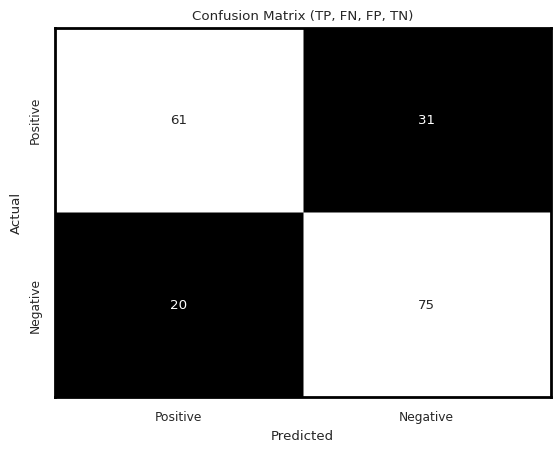

Accuracy: 0.7272727272727273
Precision: 0.7530864197530864
Recall: 0.6630434782608695
Specificity: 0.7894736842105263
F1 Score: 0.7052023121387283
False Positive Rate: 0.21052631578947367
False Negative Rate: 0.33695652173913043
AUC Score: 0.7262585812356979


In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('########### Logistic Regression ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(logreg, y_test, y_pred, True)

methodDict_accuracy['LogRegress'] = accuracy_score * 100
methodDict_precision['LogRegress'] = precision_score * 100
methodDict_recall['LogRegress'] = recall_score * 100
methodDict_specificity['LogRegress'] = specificity_score * 100
methodDict_f1['LogRegress'] = f1_score * 100
methodDict_auc_score['LogRegress'] = auc_score * 100
methodDict_false_positive_rate['LogRegress'] = fp_rate * 100
methodDict_false_negative_rate['LogRegress'] = fn_rate * 100


<font color='#FF8C00'>Evaluación generalización</font>

In [101]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = logreg.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = logreg.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)


# Calcular métricas
metrics_train_logreg = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_logreg = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_logreg)
print("Métricas en Prueba LogisticRegression:", metrics_test_logreg)


False Positive Rate (Train): 0.26036866359447003
False Negative Rate (Train): 0.3059360730593607
False Positive Rate (Test): 0.21052631578947367
False Negative Rate (Test): 0.33695652173913043
Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.716743119266055, 'F1-Score': 0.7111111111111111, 'ROC-AUC': 0.7757612103612987, 'Recall': 0.6940639269406392, 'Specificity': 0.7396313364055299, 'Precision': 0.7290167865707434, 'FP Rate': 0.26036866359447003, 'FN Rate': 0.3059360730593607}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.7272727272727273, 'F1-Score': 0.7052023121387283, 'ROC-AUC': 0.7824370709382151, 'Recall': 0.6630434782608695, 'Specificity': 0.7894736842105263, 'Precision': 0.7530864197530864, 'FP Rate': 0.21052631578947367, 'FN Rate': 0.33695652173913043}


## <font color='#FF8C00'>Decision Tree Classiffier</font>

########### Decision Tree classifier ###############


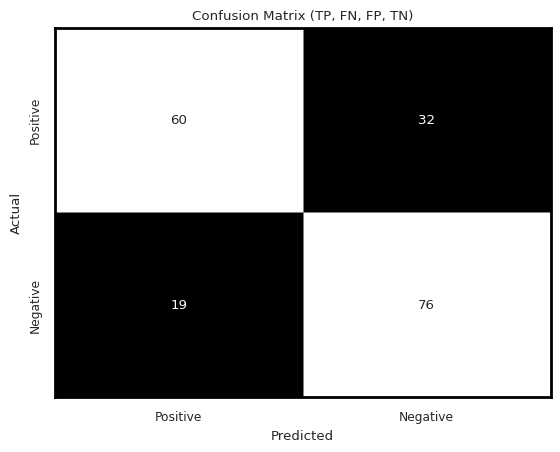

Accuracy: 0.7272727272727273
Precision: 0.759493670886076
Recall: 0.6521739130434783
Specificity: 0.8
F1 Score: 0.7017543859649122
False Positive Rate: 0.2
False Negative Rate: 0.34782608695652173
AUC Score: 0.7260869565217392


In [102]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('########### Decision Tree classifier ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(tree, y_test, y_pred, True)

methodDict_accuracy['Decision Tree'] = accuracy_score * 100
methodDict_precision['Decision Tree'] = precision_score * 100
methodDict_recall['Decision Tree'] = recall_score * 100
methodDict_specificity['Decision Tree'] = specificity_score * 100
methodDict_f1['Decision Tree'] = f1_score * 100
methodDict_auc_score['Decision Tree'] = auc_score * 100
methodDict_false_positive_rate['Decision Tree'] = fp_rate * 100
methodDict_false_negative_rate['Decision Tree'] = fn_rate * 100


<font color='#FF8C00'>Evaluación generalización</font>

In [103]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = tree.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = tree.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)

# Calcular métricas
metrics_train_tree = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, tree.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_tree = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}


# Mostrar las métricas
print("Métricas en Entrenamiento Decision Tree classifier:", metrics_train_tree)
print("Métricas en Prueba Decision Tree classifier:", metrics_test_tree)

False Positive Rate (Train): 0.21658986175115208
False Negative Rate (Train): 0.3470319634703196
False Positive Rate (Test): 0.2
False Negative Rate (Test): 0.34782608695652173
Métricas en Entrenamiento Decision Tree classifier: {'Accuracy': 0.7178899082568807, 'F1-Score': 0.6992665036674817, 'ROC-AUC': 0.7733202870189172, 'Recall': 0.6529680365296804, 'Specificity': 0.783410138248848, 'Precision': 0.7526315789473684, 'FP Rate': 0.21658986175115208, 'FN Rate': 0.3470319634703196}
Métricas en Prueba Decision Tree classifier: {'Accuracy': 0.7272727272727273, 'F1-Score': 0.7017543859649122, 'ROC-AUC': 0.7706521739130435, 'Recall': 0.6521739130434783, 'Specificity': 0.8, 'Precision': 0.759493670886076, 'FP Rate': 0.2, 'FN Rate': 0.34782608695652173}


Los resultados muestran un desempeño consistente entre los conjuntos de entrenamiento y prueba, lo que refuerza que el modelo no está sobreajustado y tiene un buen nivel de generalización.

Generalización adecuada: El modelo generaliza bien, ya que no hay una discrepancia significativa entre los conjuntos de entrenamiento y prueba.



## <font color='#FF8C00'>Random Forest Classifier </font>

########### Random Forest ###############


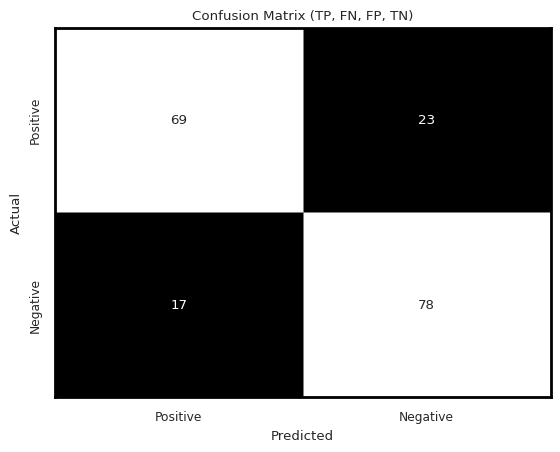

Accuracy: 0.786096256684492
Precision: 0.8023255813953488
Recall: 0.75
Specificity: 0.8210526315789474
F1 Score: 0.7752808988764045
False Positive Rate: 0.17894736842105263
False Negative Rate: 0.25
AUC Score: 0.7855263157894737


In [104]:
random_forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
# random_forest = RandomForestClassifier(max_depth = 15, min_samples_leaf=8, min_samples_split=5, n_estimators = 50, random_state = 1)
forest = random_forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('########### Random Forest ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(forest, y_test, y_pred, True)

methodDict_accuracy['Random Forest'] = accuracy_score * 100
methodDict_precision['Random Forest'] = precision_score * 100
methodDict_recall['Random Forest'] = recall_score * 100
methodDict_specificity['Random Forest'] = specificity_score * 100
methodDict_f1['Random Forest'] = f1_score * 100
methodDict_auc_score['Random Forest'] = auc_score * 100
methodDict_false_positive_rate['Random Forest'] = fp_rate * 100
methodDict_false_negative_rate['Random Forest'] = fn_rate * 100

<font color='#FF8C00'>Evaluación generalización</font>

In [105]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = random_forest.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = random_forest.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)

# Calcular métricas
metrics_train_forest = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, random_forest.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_forest = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}


# Mostrar las métricas
print("Métricas en Entrenamiento Random Forest:", metrics_train_forest)
print("Métricas en Prueba Random Forest:", metrics_test_forest)

False Positive Rate (Train): 0.24423963133640553
False Negative Rate (Train): 0.2237442922374429
False Positive Rate (Test): 0.17894736842105263
False Negative Rate (Test): 0.25
Métricas en Entrenamiento Random Forest: {'Accuracy': 0.7660550458715596, 'F1-Score': 0.7692307692307693, 'ROC-AUC': 0.8484418071249711, 'Recall': 0.776255707762557, 'Specificity': 0.7557603686635944, 'Precision': 0.7623318385650224, 'FP Rate': 0.24423963133640553, 'FN Rate': 0.2237442922374429}
Métricas en Prueba Random Forest: {'Accuracy': 0.786096256684492, 'F1-Score': 0.7752808988764045, 'ROC-AUC': 0.8407894736842105, 'Recall': 0.75, 'Specificity': 0.8210526315789474, 'Precision': 0.8023255813953488, 'FP Rate': 0.17894736842105263, 'FN Rate': 0.25}


## <font color='#FF8C00'>K Nearest Neighbors KNN</font>

########### KNeighborsClassifier ###############


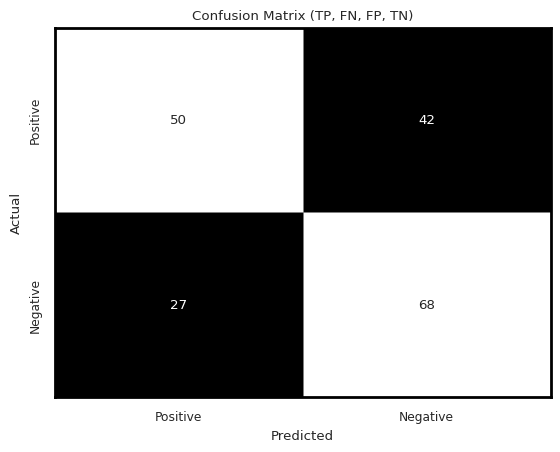

Accuracy: 0.6310160427807486
Precision: 0.6493506493506493
Recall: 0.5434782608695652
Specificity: 0.7157894736842105
F1 Score: 0.591715976331361
False Positive Rate: 0.28421052631578947
False Negative Rate: 0.45652173913043476
AUC Score: 0.629633867276888


In [106]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('########### KNeighborsClassifier ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(knn, y_test, y_pred, True)

methodDict_accuracy['KNN'] = accuracy_score * 100
methodDict_precision['KNN'] = precision_score * 100
methodDict_recall['KNN'] = recall_score * 100
methodDict_specificity['KNN'] = specificity_score * 100
methodDict_f1['KNN'] = f1_score * 100
methodDict_auc_score['KNN'] = auc_score * 100
methodDict_false_positive_rate['KNN'] = fp_rate * 100
methodDict_false_negative_rate['KNN'] = fn_rate * 100


<font color='#FF8C00'>Evaluación generalización</font>

In [107]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = knn.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = knn.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)

# Calcular métricas
metrics_train_knn = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_knn = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}


# Mostrar las métricas
print("Métricas en Entrenamiento KNN:", metrics_train_knn)
print("Métricas en Prueba KNN:", metrics_test_knn)

False Positive Rate (Train): 0.22811059907834103
False Negative Rate (Train): 0.2420091324200913
False Positive Rate (Test): 0.28421052631578947
False Negative Rate (Test): 0.45652173913043476
Métricas en Entrenamiento KNN: {'Accuracy': 0.7649082568807339, 'F1-Score': 0.7640966628308401, 'ROC-AUC': 0.840574563895377, 'Recall': 0.7579908675799086, 'Specificity': 0.771889400921659, 'Precision': 0.7703016241299304, 'FP Rate': 0.22811059907834103, 'FN Rate': 0.2420091324200913}
Métricas en Prueba KNN: {'Accuracy': 0.6310160427807486, 'F1-Score': 0.591715976331361, 'ROC-AUC': 0.7001144164759725, 'Recall': 0.5434782608695652, 'Specificity': 0.7157894736842105, 'Precision': 0.6493506493506493, 'FP Rate': 0.28421052631578947, 'FN Rate': 0.45652173913043476}


## <font color='#FF8C00'>Naive Bayes </font>

########### Naive Bayes Classifier ###############


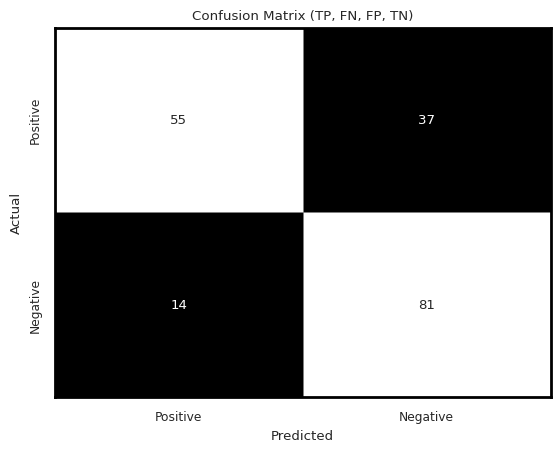

Accuracy: 0.7272727272727273
Precision: 0.7971014492753623
Recall: 0.5978260869565217
Specificity: 0.8526315789473684
F1 Score: 0.6832298136645962
False Positive Rate: 0.14736842105263157
False Negative Rate: 0.40217391304347827
AUC Score: 0.7252288329519451


In [108]:
gnb = GaussianNB(var_smoothing=1e-09, priors=None)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('########### Naive Bayes Classifier ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(gnb, y_test, y_pred, True)

methodDict_accuracy['Naive Bayes'] = accuracy_score * 100
methodDict_precision['Naive Bayes'] = precision_score * 100
methodDict_recall['Naive Bayes'] = recall_score * 100
methodDict_specificity['Naive Bayes'] = specificity_score * 100
methodDict_f1['Naive Bayes'] = f1_score * 100
methodDict_auc_score['Naive Bayes'] = auc_score * 100
methodDict_precision['Naive Bayes'] = precision_score * 100
methodDict_false_positive_rate['Naive Bayes'] = fp_rate * 100
methodDict_false_negative_rate['Naive Bayes'] = fn_rate * 100

<font color='#FF8C00'>Evaluación generalización</font>

In [109]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = gnb.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = gnb.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)

# Calcular métricas
metrics_train_gnb = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, gnb.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_gnb = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}


# Mostrar las métricas
print("Métricas en Entrenamiento Naive Bayes:", metrics_train_gnb)
print("Métricas en Prueba Naive Bayes:", metrics_test_gnb)

False Positive Rate (Train): 0.2557603686635945
False Negative Rate (Train): 0.3310502283105023
False Positive Rate (Test): 0.14736842105263157
False Negative Rate (Test): 0.40217391304347827
Métricas en Entrenamiento Naive Bayes: {'Accuracy': 0.7064220183486238, 'F1-Score': 0.6959619952494062, 'ROC-AUC': 0.7738305662521305, 'Recall': 0.6689497716894978, 'Specificity': 0.7442396313364056, 'Precision': 0.7252475247524752, 'FP Rate': 0.2557603686635945, 'FN Rate': 0.3310502283105023}
Métricas en Prueba Naive Bayes: {'Accuracy': 0.7272727272727273, 'F1-Score': 0.6832298136645962, 'ROC-AUC': 0.7952517162471395, 'Recall': 0.5978260869565217, 'Specificity': 0.8526315789473684, 'Precision': 0.7971014492753623, 'FP Rate': 0.14736842105263157, 'FN Rate': 0.40217391304347827}


In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [
        None,  # Usa la distribución de los datos
        [0.5, 0.5],  # Asumiendo clases balanceadas
        [0.7, 0.3],  # Priori con clase 0 más frecuente
        [0.3, 0.7]   # Priori con clase 1 más frecuente
    ]
}
# Crear el modelo
gnb = GaussianNB()

# Aplicar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='recall')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Best parameters:", grid_search.best_params_)

# Obtener el mejor modelo encontrado
best_gnb_model = grid_search.best_estimator_

# Evaluar en el conjunto de prueba
y_pred = best_gnb_model.predict(X_test)


Best parameters: {'priors': [0.3, 0.7], 'var_smoothing': 1e-09}


########### Naive Bayes Classifier ###############


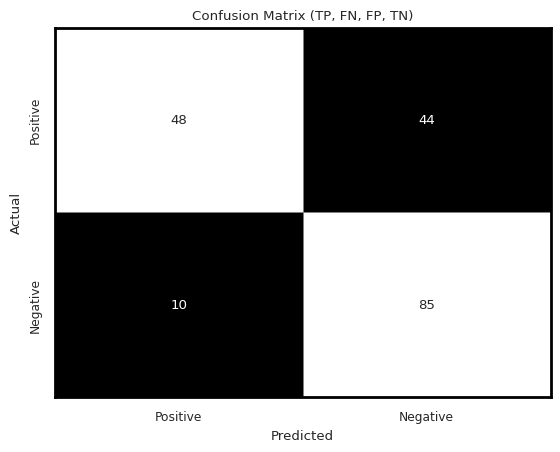

Accuracy: 0.7112299465240641
Precision: 0.8275862068965517
Recall: 0.5217391304347826
Specificity: 0.8947368421052632
F1 Score: 0.64
False Positive Rate: 0.10526315789473684
False Negative Rate: 0.4782608695652174
AUC Score: 0.708237986270023


In [111]:
gnb = GaussianNB(var_smoothing=1e-09, priors=[0.7, 0.3])
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('########### Naive Bayes Classifier ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(gnb, y_test, y_pred, True)

## <font color='#FF8C00'>Support Vector Classifier SVC </font>

########### Support Vector Classifier sin Scaler ###############


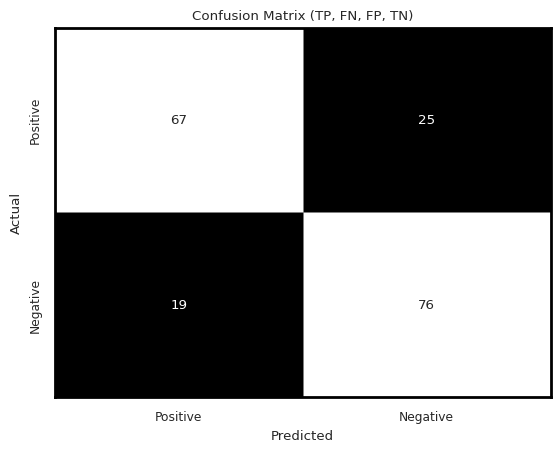

Accuracy: 0.7647058823529411
Precision: 0.7790697674418605
Recall: 0.7282608695652174
Specificity: 0.8
F1 Score: 0.7528089887640449
False Positive Rate: 0.2
False Negative Rate: 0.2717391304347826
AUC Score: 0.7641304347826087


In [112]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# svc = [('clf', SVC())]
svc = [('clf', SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',  probability=True))]

clf_svc = Pipeline(steps=svc)

clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)

print('########### Support Vector Classifier sin Scaler ###############')
accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(clf_svc, y_test, y_pred, True)

methodDict_accuracy['Support Vector Classifier'] = accuracy_score * 100
methodDict_precision['Support Vector Classifier'] = precision_score * 100
methodDict_recall['Support Vector Classifier'] = recall_score * 100
methodDict_specificity['Support Vector Classifier'] = specificity_score * 100
methodDict_f1['Support Vector Classifier'] = f1_score * 100
methodDict_auc_score['Support Vector Classifier'] = accuracy_score * 100
methodDict_false_positive_rate['Support Vector Classifier'] = fp_rate * 100
methodDict_false_negative_rate['Support Vector Classifier'] = fn_rate * 100

<font color='#FF8C00'>Evaluación generalización</font>

In [113]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = clf_svc.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = clf_svc.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)

# Calcular métricas
metrics_train_clf_svc = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, clf_svc.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_clf_svc = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, clf_svc.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}


# Mostrar las métricas
print("Métricas en Entrenamiento Support Vector Classifier:", metrics_train_clf_svc)
print("Métricas en Prueba Support Vector Classifier:", metrics_test_clf_svc)

False Positive Rate (Train): 0.2350230414746544
False Negative Rate (Train): 0.2557077625570776
False Positive Rate (Test): 0.2
False Negative Rate (Test): 0.2717391304347826
Métricas en Entrenamiento Support Vector Classifier: {'Accuracy': 0.7545871559633027, 'F1-Score': 0.7528868360277137, 'ROC-AUC': 0.8214127895966162, 'Recall': 0.7442922374429224, 'Specificity': 0.7649769585253456, 'Precision': 0.7616822429906542, 'FP Rate': 0.2350230414746544, 'FN Rate': 0.2557077625570776}
Métricas en Prueba Support Vector Classifier: {'Accuracy': 0.7647058823529411, 'F1-Score': 0.7528089887640449, 'ROC-AUC': 0.8088672768878719, 'Recall': 0.7282608695652174, 'Specificity': 0.8, 'Precision': 0.7790697674418605, 'FP Rate': 0.2, 'FN Rate': 0.2717391304347826}


## <font color='#FF8C00'>XGBoost</font>

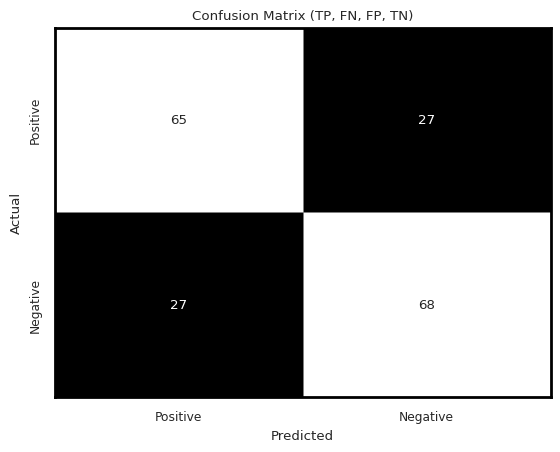

Accuracy: 0.7112299465240641
Precision: 0.7065217391304348
Recall: 0.7065217391304348
Specificity: 0.7157894736842105
F1 Score: 0.7065217391304348
False Positive Rate: 0.28421052631578947
False Negative Rate: 0.29347826086956524
AUC Score: 0.7111556064073227


In [114]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as skl_recall_score

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf_xgb.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = clf_xgb.predict(X_test_scaled)

accuracy_score, precision_score, recall_score, specificity_score, f1_score, auc_score,fp_rate, fn_rate = evalClassModel(clf_xgb, y_test, y_pred, True)

# Guardar el resultado en el diccionario
methodDict_accuracy['XGBoost'] = accuracy_score * 100
methodDict_precision['XGBoost'] = precision_score * 100
methodDict_recall['XGBoost'] = recall_score * 100
methodDict_specificity['XGBoost'] = specificity_score * 100
methodDict_f1['XGBoost'] = f1_score * 100
methodDict_auc_score['XGBoost'] = auc_score * 100
methodDict_false_positive_rate['XGBoost'] = fp_rate * 100
methodDict_false_negative_rate['XGBoost'] = fn_rate * 100

<font color='#FF8C00'>Evaluación generalización</font>

In [115]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = clf_xgb.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = clf_xgb.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
confusion_train = metrics.confusion_matrix(y_train, y_train_pred)

TP_train = confusion_train[1, 1]
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]

# Calcular False Positive Rate y False Negative Rate en entrenamiento
false_positive_rate_train = FP_train / float(FP_train + TN_train)
false_negative_rate_train = FN_train / float(FN_train + TP_train)

print('False Positive Rate (Train):', false_positive_rate_train)
print('False Negative Rate (Train):', false_negative_rate_train)

# Matriz de confusión para el conjunto de prueba
confusion_test = metrics.confusion_matrix(y_test, y_test_pred)

TP_test = confusion_test[1, 1]
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]

# Calcular False Positive Rate y False Negative Rate en prueba
false_positive_rate_test = FP_test / float(FP_test + TN_test)
false_negative_rate_test = FN_test / float(FN_test + TP_test)

print('False Positive Rate (Test):', false_positive_rate_test)
print('False Negative Rate (Test):', false_negative_rate_test)

# Calcular métricas
metrics_train_clf_xgb = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, clf_xgb.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0),
    'Precision': precision_score(y_train, y_train_pred),
    'FP Rate': false_positive_rate_train,
    'FN Rate': false_negative_rate_train
}

metrics_test_clf_xgb = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, clf_xgb.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
    'Precision': precision_score(y_test, y_test_pred),
    'FP Rate': false_positive_rate_test,
    'FN Rate': false_negative_rate_test
}


# Mostrar las métricas
print("Métricas en Entrenamiento XGBoost:", metrics_train_clf_xgb)
print("Métricas en Prueba XGBoost:", metrics_test_clf_xgb)

False Positive Rate (Train): 0.2995391705069124
False Negative Rate (Train): 0.5502283105022832
False Positive Rate (Test): 0.35789473684210527
False Negative Rate (Test): 0.6086956521739131
Métricas en Entrenamiento XGBoost: {'Accuracy': 0.5745412844036697, 'F1-Score': 0.515032679738562, 'ROC-AUC': 0.5905640426740736, 'Recall': 0.4497716894977169, 'Specificity': 0.7004608294930875, 'Precision': 0.6024464831804281, 'FP Rate': 0.2995391705069124, 'FN Rate': 0.5502283105022832}
Métricas en Prueba XGBoost: {'Accuracy': 0.5187165775401069, 'F1-Score': 0.4444444444444444, 'ROC-AUC': 0.5265446224256293, 'Recall': 0.391304347826087, 'Specificity': 0.6421052631578947, 'Precision': 0.5142857142857142, 'FP Rate': 0.35789473684210527, 'FN Rate': 0.6086956521739131}


## <font color='#FF8C00'>Conclusiones Supervised ML</font>

### <font color='#FF8C00'>Recall</font>

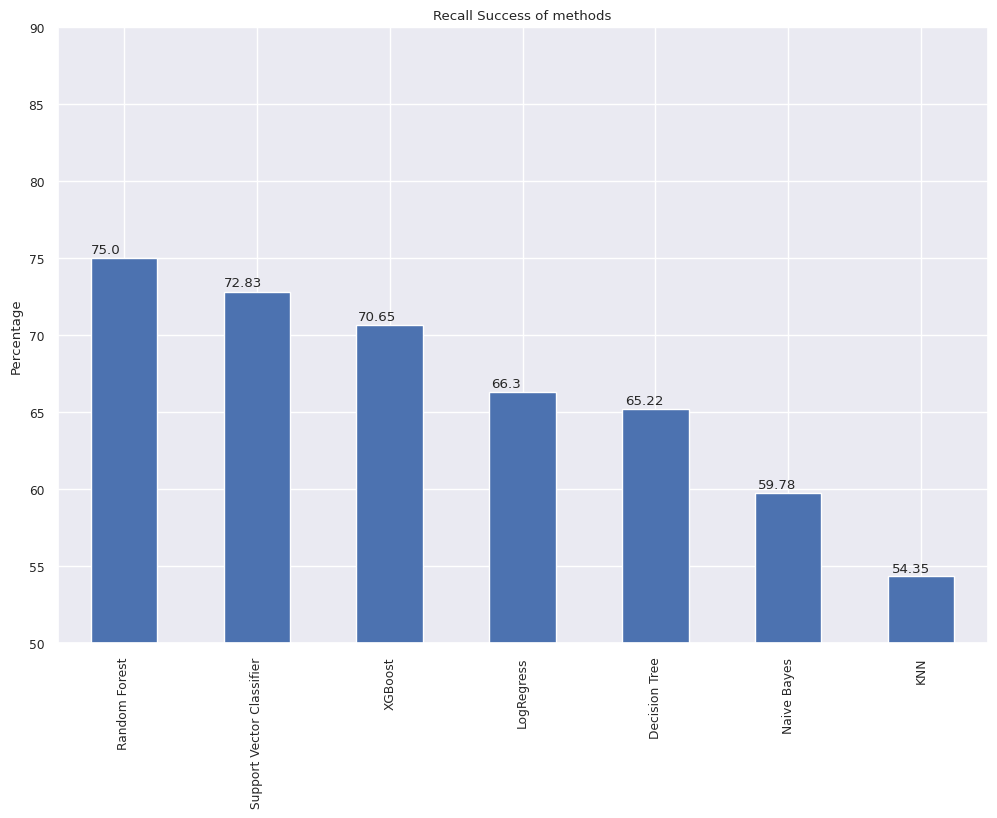

In [116]:
def plotSuccess():
    s = pd.Series(methodDict_recall)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([50.0, 90.0])
    plt.ylabel('Percentage')
    plt.title('Recall Success of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>Specificity</font>

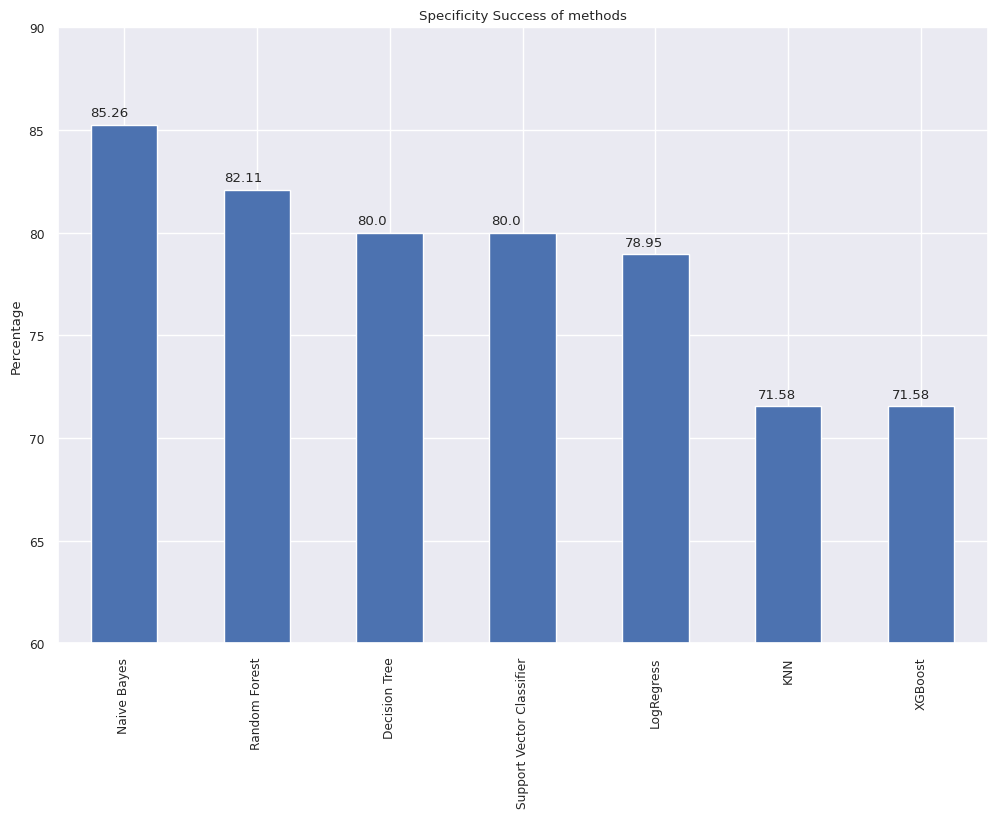

In [117]:
def plotSuccess():
    s = pd.Series(methodDict_specificity)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.ylabel('Percentage')
    plt.title('Specificity Success of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>Precision</font>

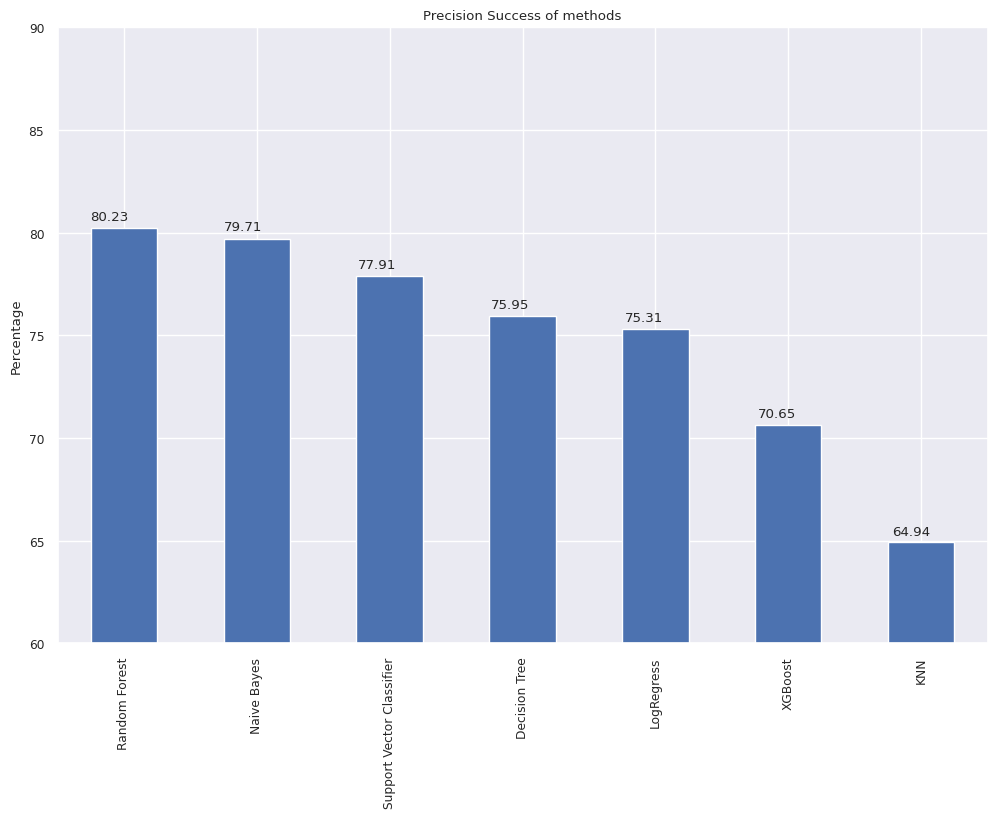

In [118]:
def plotSuccess():
    s = pd.Series(methodDict_precision)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.ylabel('Percentage')
    plt.title('Precision Success of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>False Positive Rate</font>

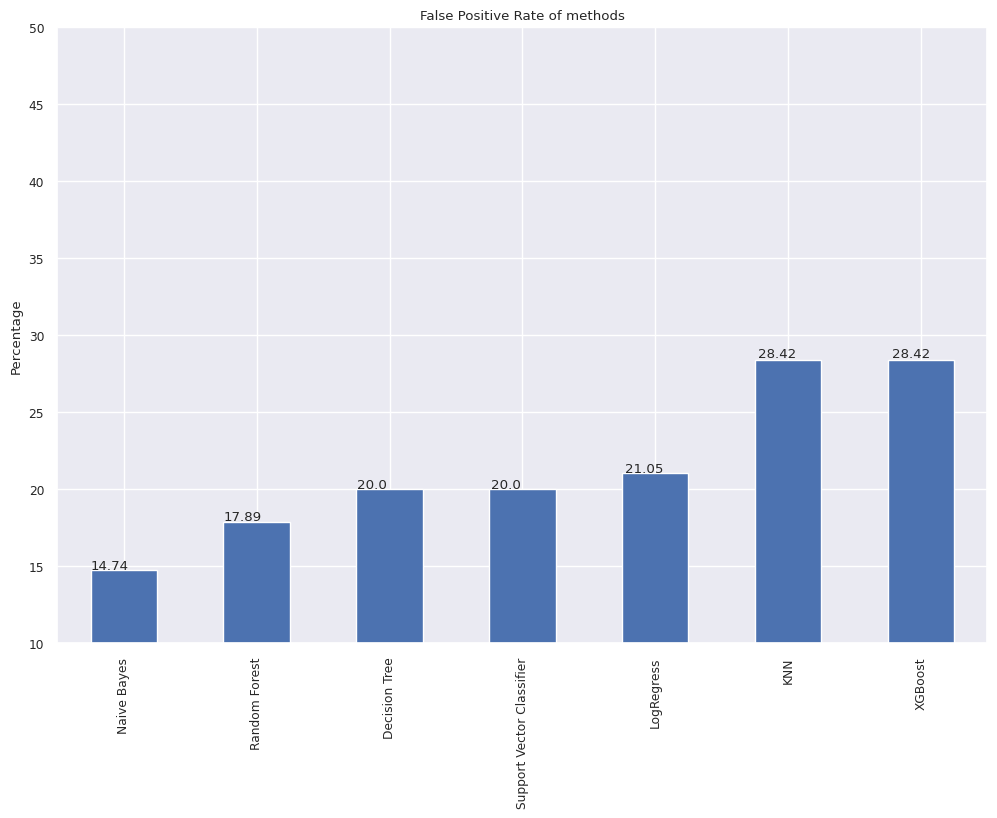

In [119]:
def plotSuccess():
    s = pd.Series(methodDict_false_positive_rate)
    s = s.sort_values(ascending=True)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([10.0, 50.0])
    plt.ylabel('Percentage')
    plt.title('False Positive Rate of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>False Negative Rate</font>

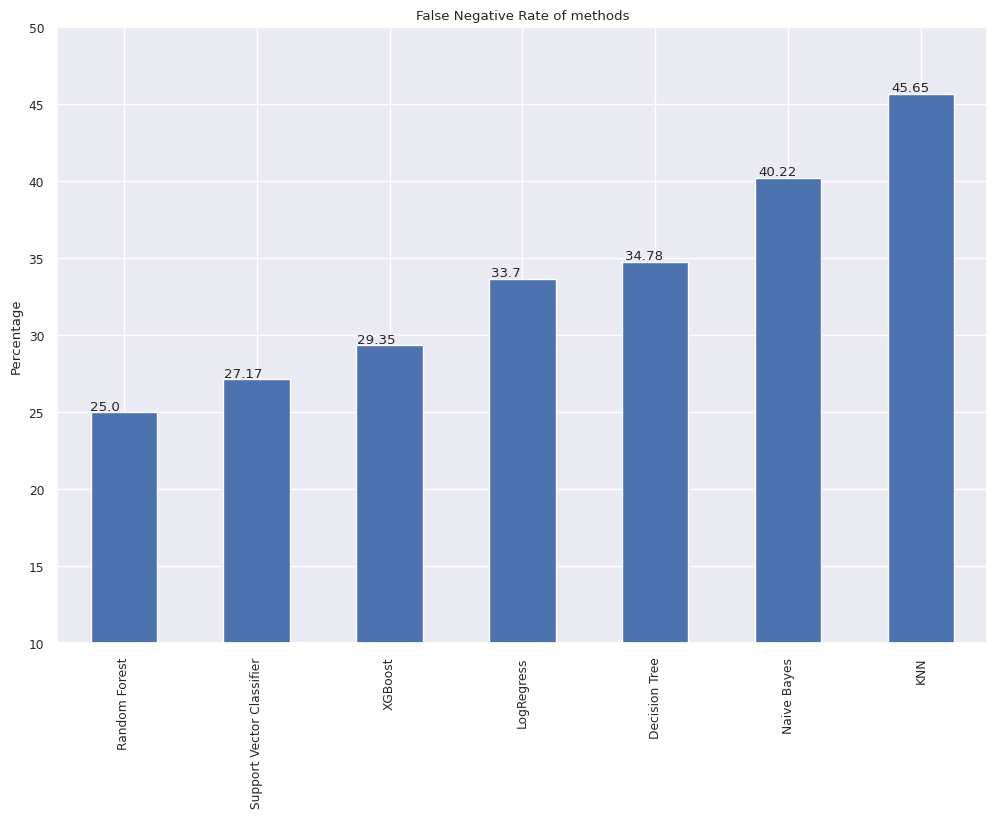

In [120]:
def plotSuccess():
    s = pd.Series(methodDict_false_negative_rate)
    s = s.sort_values(ascending=True)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([10.0, 50.0])
    plt.ylabel('Percentage')
    plt.title('False Negative Rate of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>Accuracy</font>

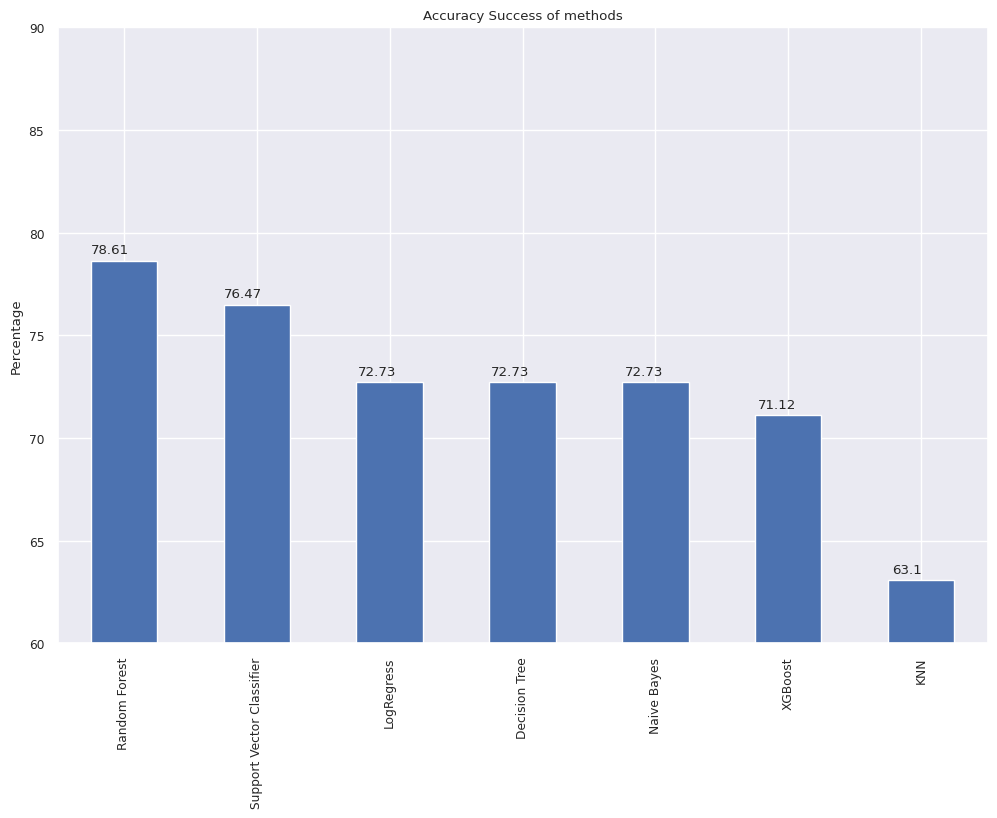

In [121]:
def plotSuccess():
    s = pd.Series(methodDict_accuracy)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.ylabel('Percentage')
    plt.title('Accuracy Success of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>F1 Score</font>

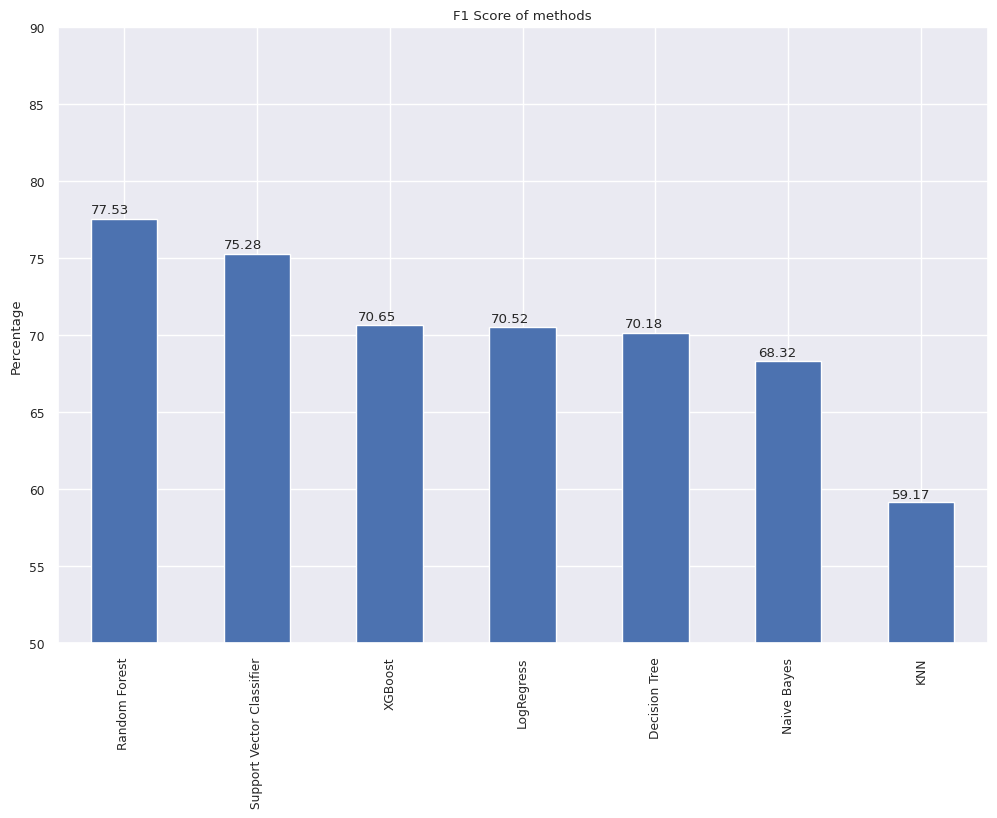

In [122]:
def plotSuccess():
    s = pd.Series(methodDict_f1)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([50.0, 90.0])
    plt.ylabel('Percentage')
    plt.title('F1 Score of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>AUC Score</font>

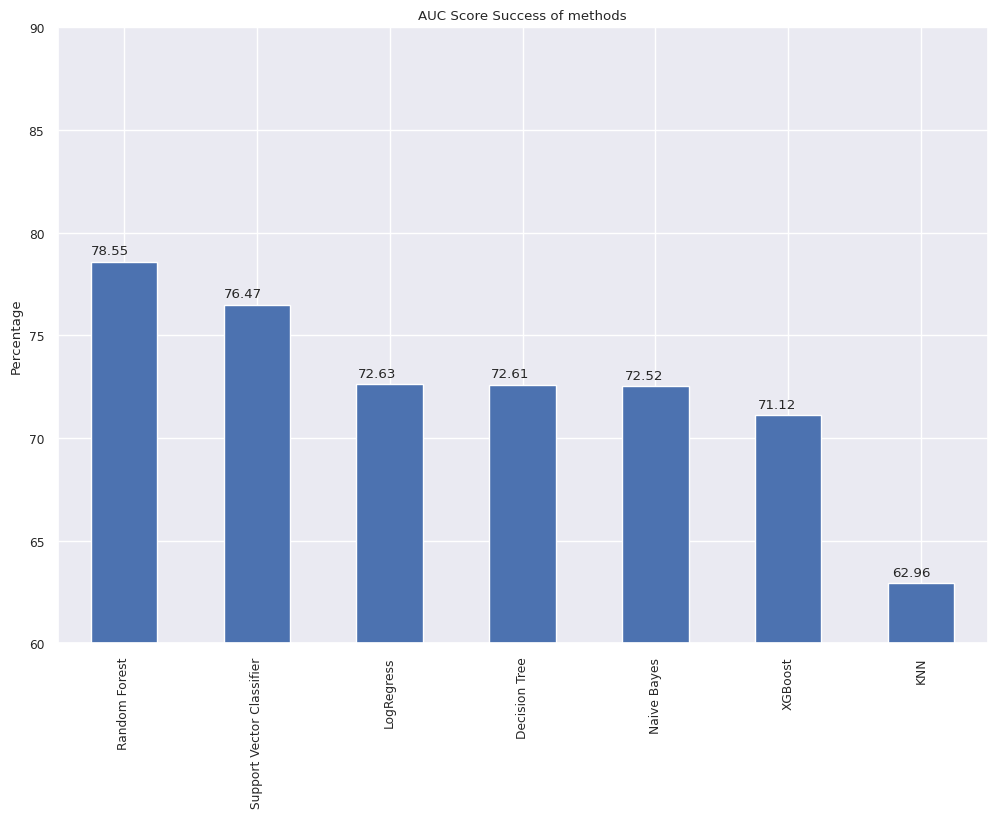

In [123]:
def plotSuccess():
    s = pd.Series(methodDict_auc_score)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.ylabel('Percentage')
    plt.title('AUC Score Success of methods')

    plt.show()

plotSuccess()

### <font color='#FF8C00'>Generalización -sobreajuste-</font>

In [124]:
# Crear un diccionario con las métricas de los modelos
results = {
    "Logistic Regression": {
        "train": metrics_train_logreg,
        "test": metrics_test_logreg
    },
    "Decision Tree": {
        "train": metrics_train_tree,
        "test": metrics_test_tree
    },
    "Random Forest": {
        "train": metrics_train_forest,
        "test": metrics_test_forest
    },
    "KNN": {
        "train": metrics_train_knn,
        "test": metrics_test_knn
    },
    "Naive Bayes": {
        "train": metrics_train_gnb,
        "test": metrics_test_gnb
    },
    "Support Vector Classifier": {
        "train": metrics_train_clf_svc,
        "test": metrics_test_clf_svc
    },
    "XGBoost": {
        "train": metrics_train_clf_xgb,
        "test": metrics_test_clf_xgb
    }
}

# Calcular diferencias entre métricas de entrenamiento y prueba
comparison = []

for model, metrics in results.items():
    train_accuracy = metrics["train"]["Accuracy"]
    test_accuracy = metrics["test"]["Accuracy"]
    train_recall = metrics["train"]["Recall"]
    test_recall = metrics["test"]["Recall"]
    train_specificity = metrics["train"]["Specificity"]
    test_specificity = metrics["test"]["Specificity"]
    train_f1 = metrics["train"]["F1-Score"]
    test_f1 = metrics["test"]["F1-Score"]
    train_auc_score = metrics["train"]["ROC-AUC"]
    test_auc_score = metrics["test"]["ROC-AUC"]
    train_precision = metrics["train"]["Precision"]
    test_precision = metrics["test"]["Precision"]
    train_false_positive_rate = metrics["train"]["FP Rate"]
    test_false_positive_rate = metrics["test"]["FP Rate"]
    train_false_negative_rate = metrics["train"]["FN Rate"]
    test_false_negative_rate = metrics["test"]["FN Rate"]

    # Calcular diferencias relativas
    accuracy_diff = abs(train_accuracy - test_accuracy)
    recall_diff = abs(train_recall - test_recall)
    specificity_diff = abs(train_specificity - test_specificity)
    f1_diff = abs(train_f1 - test_f1)
    auc_score_diff = abs(train_auc_score - test_auc_score)
    precision_diff = abs(train_precision - test_precision)
    false_positive_rate_diff = abs(train_false_positive_rate - test_false_positive_rate)
    false_negative_rate_diff = abs(train_false_negative_rate - test_false_negative_rate)

    # Guardar resultados
    comparison.append({
        "Model": model,
        "Accuracy Difference": accuracy_diff,
        "Recall Difference": recall_diff,
        "Specificity Difference": specificity_diff,
        "F1 Difference": f1_diff,
        "AUC Score Difference": auc_score_diff,
        "Precision Difference": precision_diff,
        "FP Rate Difference": false_positive_rate_diff,
        "FN Rate Difference": false_negative_rate_diff
    })

    comparison_df = pd.DataFrame(comparison)


In [125]:
print (train_false_negative_rate)
print (test_false_negative_rate)
print (train_false_positive_rate)
print (test_false_positive_rate)

0.5502283105022832
0.6086956521739131
0.2995391705069124
0.35789473684210527


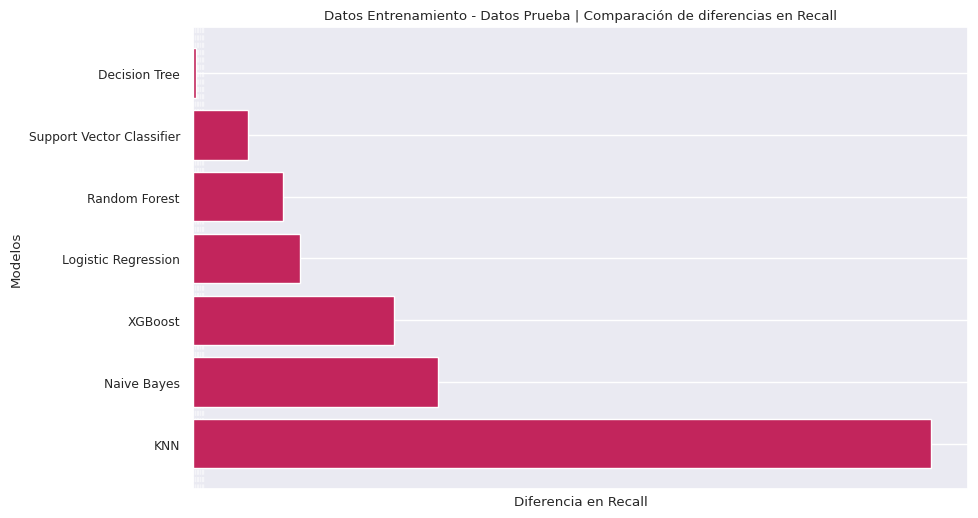

In [126]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por "Recall Difference"
sorted_df = comparison_df.sort_values(by="Recall Difference")

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Recall Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Recall")
plt.ylabel("Modelos")
plt.title("Datos Entrenamiento - Datos Prueba | Comparación de diferencias en Recall")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

In [127]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
print(sorted_df[["Model", "Recall Difference"]])

                       Model  Recall Difference
1              Decision Tree            0.00079
5  Support Vector Classifier            0.01603
2              Random Forest            0.02626
0        Logistic Regression            0.03102
6                    XGBoost            0.05847
4                Naive Bayes            0.07112
3                        KNN            0.21451


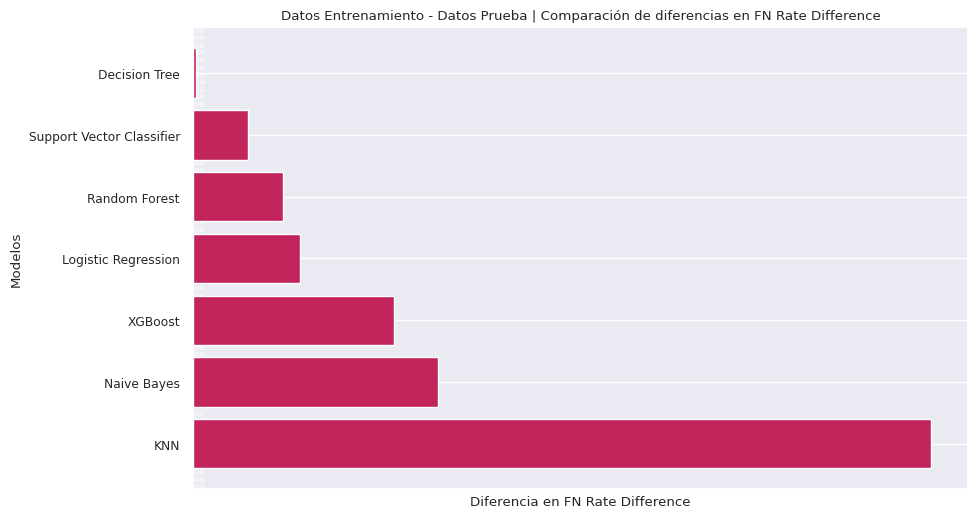

In [128]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por "FN Rate Difference"
sorted_df = comparison_df.sort_values(by="FN Rate Difference")

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["FN Rate Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en FN Rate Difference")
plt.ylabel("Modelos")
plt.title("Datos Entrenamiento - Datos Prueba | Comparación de diferencias en FN Rate Difference")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

In [129]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
print(sorted_df[["Model", "FN Rate Difference"]])

                       Model  FN Rate Difference
1              Decision Tree             0.00079
5  Support Vector Classifier             0.01603
2              Random Forest             0.02626
0        Logistic Regression             0.03102
6                    XGBoost             0.05847
4                Naive Bayes             0.07112
3                        KNN             0.21451


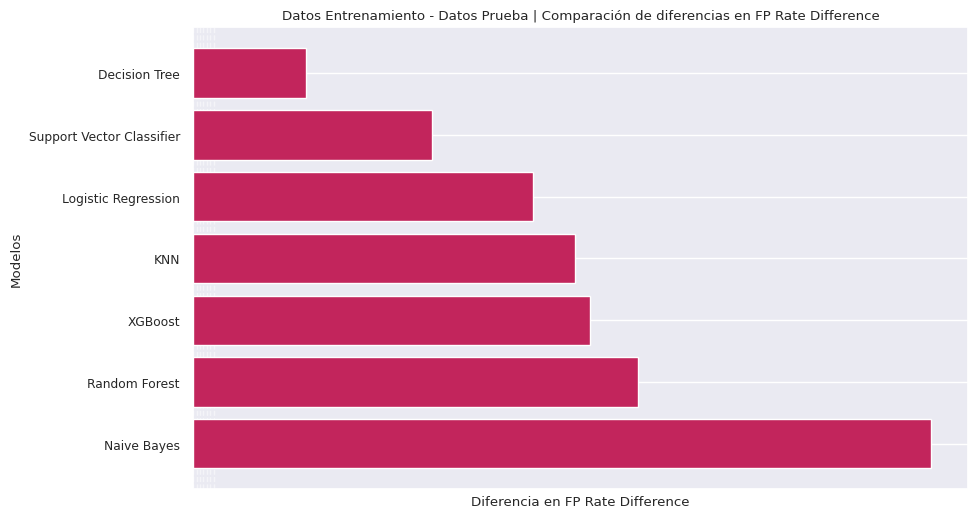

In [130]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por "FP Rate Difference"
sorted_df = comparison_df.sort_values(by="FP Rate Difference")

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["FP Rate Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en FP Rate Difference")
plt.ylabel("Modelos")
plt.title("Datos Entrenamiento - Datos Prueba | Comparación de diferencias en FP Rate Difference")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

In [131]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
print(sorted_df[["Model", "FP Rate Difference"]])

                       Model  FP Rate Difference
1              Decision Tree             0.01659
5  Support Vector Classifier             0.03502
0        Logistic Regression             0.04984
3                        KNN             0.05610
6                    XGBoost             0.05836
2              Random Forest             0.06529
4                Naive Bayes             0.10839


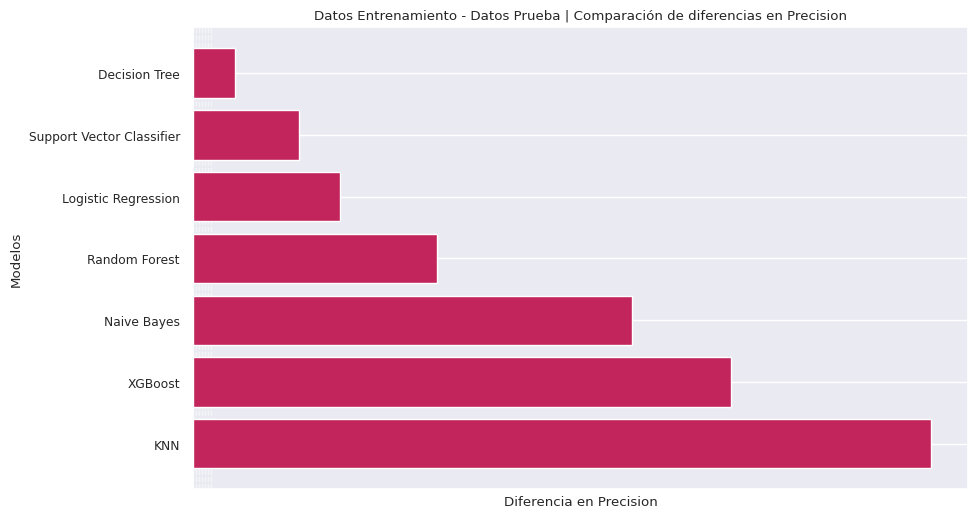

In [132]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por "Precision Difference"
sorted_df = comparison_df.sort_values(by="Precision Difference")

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Precision Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Precision")
plt.ylabel("Modelos")
plt.title("Datos Entrenamiento - Datos Prueba | Comparación de diferencias en Precision")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

In [133]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
print(sorted_df[["Model", "Precision Difference"]])

                       Model  Precision Difference
1              Decision Tree               0.00686
5  Support Vector Classifier               0.01739
0        Logistic Regression               0.02407
2              Random Forest               0.03999
4                Naive Bayes               0.07185
6                    XGBoost               0.08816
3                        KNN               0.12095


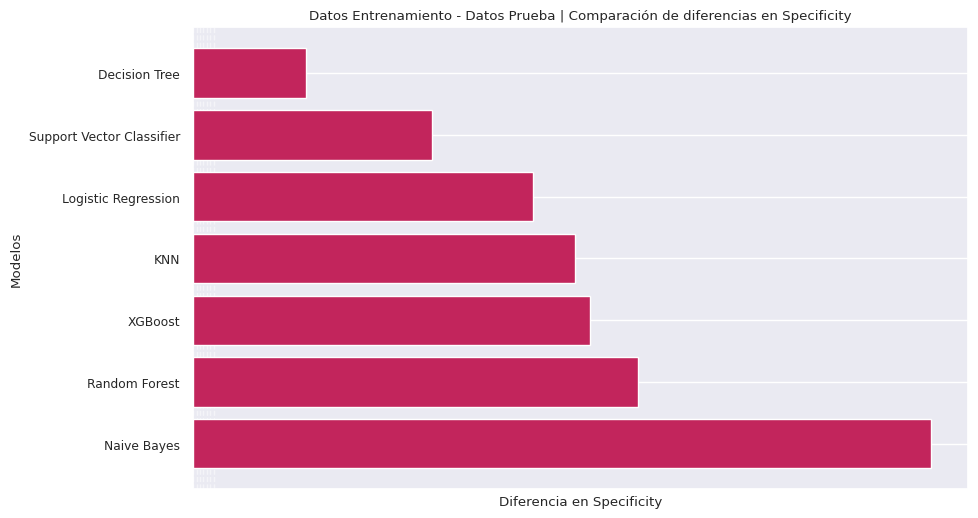

In [134]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por "Specificity Difference"
sorted_df = comparison_df.sort_values(by="Specificity Difference")

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Specificity Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Specificity")
plt.ylabel("Modelos")
plt.title("Datos Entrenamiento - Datos Prueba | Comparación de diferencias en Specificity")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

In [135]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
print(sorted_df[["Model", "Specificity Difference"]])

                       Model  Specificity Difference
1              Decision Tree                 0.01659
5  Support Vector Classifier                 0.03502
0        Logistic Regression                 0.04984
3                        KNN                 0.05610
6                    XGBoost                 0.05836
2              Random Forest                 0.06529
4                Naive Bayes                 0.10839


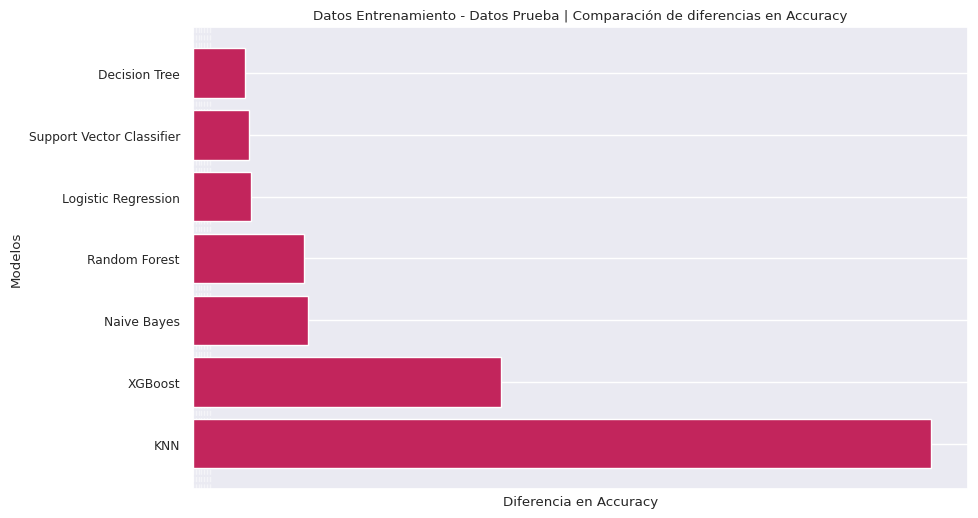

In [136]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por "Accuracy Difference"
sorted_df = comparison_df.sort_values(by="Accuracy Difference")

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Accuracy Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Accuracy")
plt.ylabel("Modelos")
plt.title("Datos Entrenamiento - Datos Prueba | Comparación de diferencias en Accuracy")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()
